In [1]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf

In [ ]:
# Watermark is not required for this code, but is included for information. 
#import watermark
#%load_ext watermark
#%watermark -a "ELEANOR LUTZ" -d -v -iv -m
# Find the Segoe font that can plot symbols used in map
# Code from the tutorial at this link:
# https://jdhao.github.io/2018/04/08/matplotlib-unicode-characfrom fontTools.ttLib import TTFont

In [2]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

def char_in_font(Unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False

uni_chars = [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb", 
             u"\u2724", u"\u25c8", u"\u2388", u"\u214f"]

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]

for uni_char in uni_chars:
    for i, font in enumerate(font_info):
        if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
            if font[1].split()[0] == "Segoe":
                print(uni_char, ":", font[0], font[1])
                break
                
seguihis = 'Users\viktorialubomski\Library\Fonts\seguihis.ttf'
prop_seguihis = mfm.FontProperties(fname=seguihis)

seguisym = 'Users\viktorialubomski\Library\Fonts\seguisym.ttf'
prop_seguisym = mfm.FontProperties(fname=seguisym)

In [3]:
def set_save_image(fig, savename, dpi=1200):
    # Output text as editable PDF text objects instead of shapes
    matplotlib.rcParams['pdf.fonttype'] = 42
    
    # Force PDF to respect zorder by supressing image compositing
    matplotlib.rcParams['image.composite_image'] = False

    # Remove borders on the plot axes
    for ax in fig.get_axes():
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.axis('off')
        try:
            ax.set_global()
            ax.outline_patch.set_edgecolor('none')
            ax.background_patch.set_fill(False)
        except:
            pass 
        
    # Remove all padding and margins
    plt.tight_layout()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")

    plt.show()
    plt.clf()
    plt.close('all')

In [4]:
stars = pd.read_csv('./data/processed/hygdata_processed_mag65.csv')
asterisms = pd.read_csv('./data/processed/asterisms.csv')
constellations = pd.read_csv('./data/processed/constellations.csv')
const_names = pd.read_csv('./data/processed/centered_constellations.csv', encoding="latin-1")
messiers = pd.read_csv('./data/processed/messier_ngc_processed.csv')
display(messiers.head())

print(len(stars), 'stars to plot')
print(len(asterisms), 'asterisms to plot')
print(len(constellations), 'constellations to plot')
print(len(const_names), 'constellation names to plot')
print(len(messiers), 'messier objects to plot')
print(len(messiers[pd.notnull(messiers['proper_name'])]), 'named messiers to plot')

figsize = (20, 10)
const_color = '#ff2620'
zodiac_color = '#fcb322'
nonzodiac_color = '#77a9da'
other_color = '#979330'

class LowerThresholdPlateCarree(ccrs.PlateCarree):
    ''' Add a new class to increase resolution of Geodetic vectors '''
    @property
    def threshold(self):
        return 0.01

,name,type,ra,dec,magnitude,proper_name,ra_original,dec_original,code,name_2
0,M11,open cluster,18.851667,-6.266667,5.8,Wild Duck Cluster,18h 51.1m,-6d 16',ᚸ,Wild Duck Cluster
1,M13,globular cluster,16.695000,36.466667,5.8,Hercules Cluster,16h 41.7m,+36d 28',✤,Hercules Cluster
2,M15,globular cluster,21.500000,12.166667,6.2,NaN,21h 30m,+12d 10',✤,M15
3,M16,open cluster,18.313333,-13.783333,6.0,Eagle Nebula,18h 18.8m,-13d 47',ᚸ,Eagle Nebula
4,M17,"emission nebula, open cluster",18.346667,-16.183333,6.0,Swan Nebula,18h 20.8m,-16d 11',◈,Swan Nebula


8912 stars to plot
88 asterisms to plot
89 constellations to plot
88 constellation names to plot
66 messier objects to plot
16 named messiers to plot


<ipython-input-3-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-3-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


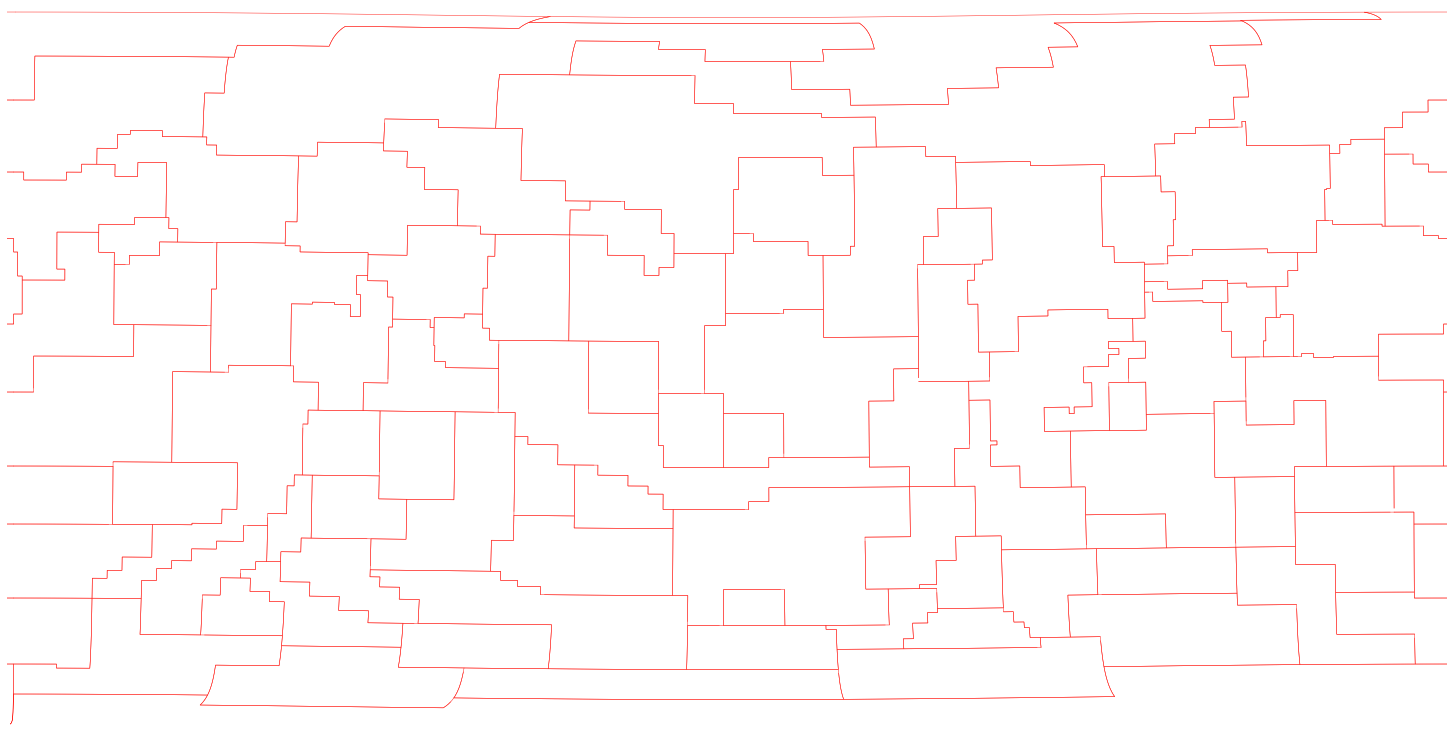

In [5]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=LowerThresholdPlateCarree(180))

for index, row in constellations.iterrows():
    ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=1, color=const_color)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/constellations.png')

In [ ]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=LowerThresholdPlateCarree(180))

for index, row in asterisms.iterrows():
    ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    color = nonzodiac_color
    if row['zodiac'] == True: 
        color = zodiac_color
    assert len(asterisms)%2 == 0
    for n in range(int(len(asterisms)/2)):
        ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), color=color, lw=0.5)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/asterisms.png')

In [ ]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

for index, row in const_names.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['name'], 
            transform=ccrs.Geodetic(), ha='left', va='top', fontsize=8, color=nonzodiac_color)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/constellation_names.pdf')

In [ ]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

bayers = stars[pd.notnull(stars['bayer'])]
print(len(bayers), 'labeled stars to plot')

for index, row in bayers.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['greek_letters'], transform=ccrs.Geodetic(), 
            ha='center', va='center', fontsize=2, color=row['linecolor'], fontproperties=prop_seguisym)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/greek_letters.pdf')

131 labeled stars to plot


<ipython-input-3-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-3-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


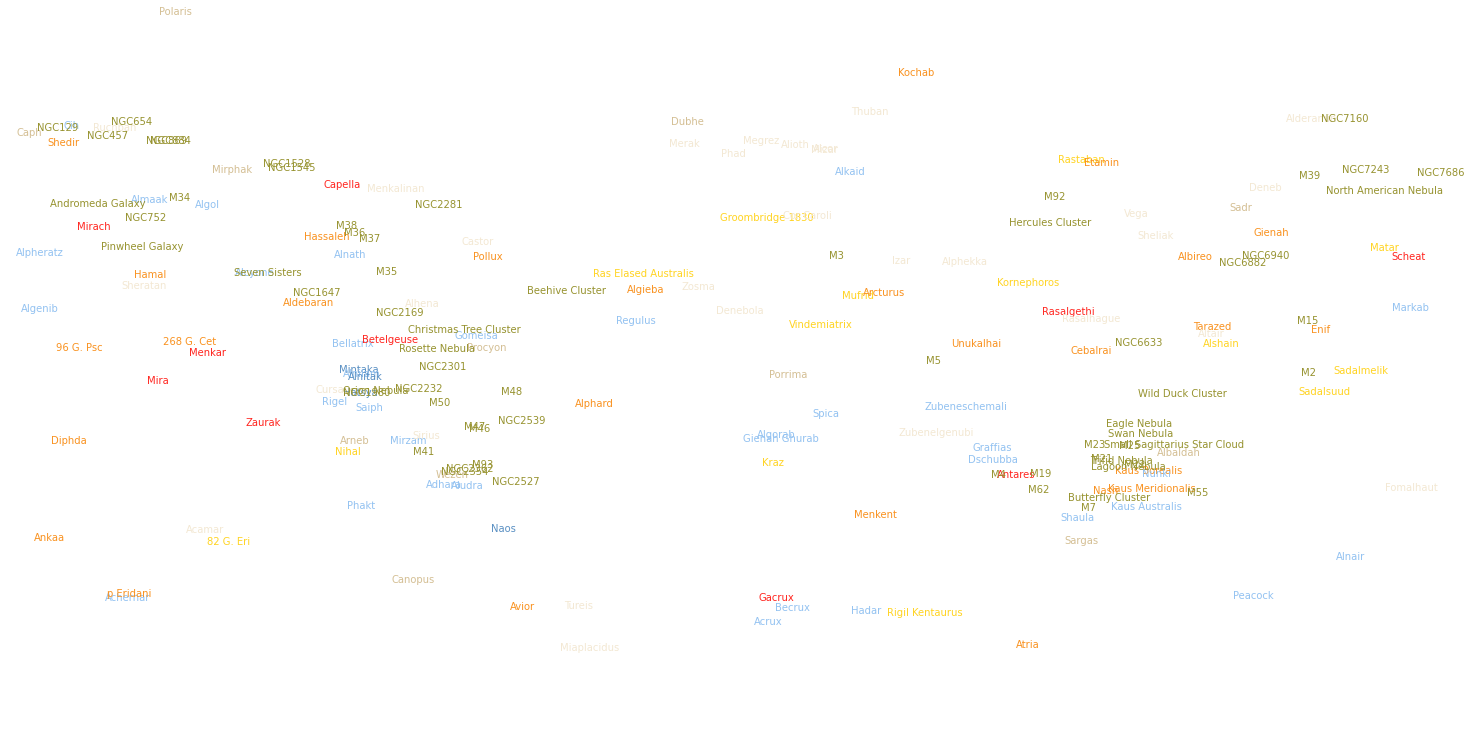

In [6]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

names = stars[pd.notnull(stars['proper'])]
print(len(names), 'labeled stars to plot')

for index, row in names.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['proper'], color=row['linecolor'],
            ha='left', va='center', transform=ccrs.Geodetic())
    
for index, row in messiers.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['name_2'], color=other_color,
            ha='left', va='center', transform=ccrs.Geodetic())
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/names.pdf')

7717 non-variable stars to plot
0.0053 -44.290561 6.28 #FFD423
0.006638 26.918108 6.43 #d4bf94
0.008593 59.559679 6.18 #FFD423
0.009533 -53.097713 6.49 #FFD423
0.017941 -48.809876 5.71 #FFD423
0.022013 49.981558 6.22 #FFD423
0.022255 -50.337373 5.53 #FF2620
0.026616 -77.065724 4.78 #F99220
0.026949 61.222801 5.58 #d4bf94
0.027597000000000003 73.611846 6.5 #f3e8d3
0.028847 42.367144 6.25 #93C2F1
0.030402 -3.027504 5.13 #93C2F1
0.036139 27.082256 5.8 #FFD423
0.038867 -29.720414 5.04 #93C2F1
0.040046 8.956824000000003 6.33 #f3e8d3
0.041584 8.485463000000001 5.7 #d4bf94
0.043357 66.098966 5.87 #FFD423
0.049301 -20.045882 6.25 #d4bf94
0.052180999999999984 -24.145145 6.46 #F99220
0.06233 -17.335988 4.55 #93C2F1
0.070462 62.287664 5.9 #f3e8d3
0.07216499999999999 -16.529035999999998 5.78 #F99220
0.07231 -29.268822 6.38 #f3e8d3
0.075033 -10.509523 4.99 #F99220
0.07683 42.09253 6.11 #93C2F1
0.07813099999999999 -71.436891 5.59 #93C2F1
0.078304 67.166445 5.68 #F99220
0.081573 34.659797 6.09 #FFD42

1.240011 -7.922826 5.14 #d4bf94
1.245109 6.9951360000000005 6.04 #FFD423
1.246992 -0.973795 5.7 #d4bf94
1.253043 -45.531664 4.97 #d4bf94
1.262704 -68.875927 4.25 #d4bf94
1.270176 87.145496 6.2 #F99220
1.271922 33.11472 6.04 #F99220
1.275281 79.910013 6.27 #d4bf94
1.2843639999999998 -66.39785400000001 6.23 #f3e8d3
1.284739 44.901992 6.11 #F99220
1.290033 31.744617 6.36 #F99220
1.2966540000000002 3.614466 5.13 #f3e8d3
1.302818 47.419706 6.29 #F99220
1.313058 37.386275 6.44 #f3e8d3
1.324443 27.264059000000003 4.74 #f3e8d3
1.330082 -0.509029 5.87 #f3e8d3
1.334699 58.231611 4.95 #d4bf94
1.338733 77.57068199999998 6.31 #FFD423
1.341058 -11.238999 6.16 #F99220
1.342937 -3.2469900000000003 6.26 #F99220
1.35145 64.65813100000001 6.33 #f3e8d3
1.352047 28.738207 5.23 #F99220
1.366383 76.238804 6.37 #d4bf94
1.372337 45.528778 4.87 #F99220
1.375134 -19.081208 6.35 #d4bf94
1.376342 -0.4496729999999999 6.5 #F99220
1.376931 1.726332 6.21 #FF2620
1.3892639999999998 58.142994 6.36 #d4bf94
1.390264 20.46

2.344864 47.310804 6.17 #93C2F1
2.362498 -68.659418 4.08 #f3e8d3
2.365399 57.242916 6.4 #f3e8d3
2.36573 0.395675 5.29 #FF2620
2.367092 -10.777534 5.43 #d4bf94
2.368051 -17.662169 5.89 #F99220
2.369927 -43.199811 6.3 #F99220
2.37011 -0.8848520000000001 5.42 #d4bf94
2.3757040000000003 -23.816326 5.19 #FFD423
2.380644 41.396297 5.81 #d4bf94
2.38123 -73.645792 5.99 #F99220
2.381852 -51.092129 5.9 #f3e8d3
2.382673 -18.354982 6.22 #FFD423
2.385166 -37.576144 6.47 #F99220
2.4055880000000003 -25.847459 6.45 #F99220
2.406919 50.006546 5.19 #FFD423
2.4094 -40.840458 6.17 #FFD423
2.413627 10.610565 5.48 #93C2F1
2.414987 -60.311947 5.36 #d4bf94
2.42706 50.278631 4.73 #F99220
2.432501 -12.29048 4.88 #f3e8d3
2.443115 -20.042617 5.89 #F99220
2.449755 -47.70384 4.24 #93C2F1
2.452011 27.012395 6.14 #F99220
2.456498 10.198326 6.45 #d4bf94
2.4577150000000003 31.80128 5.55 #F99220
2.46438 50.569974 6.16 #d4bf94
2.466647 1.960846 6.45 #F99220
2.467139 -33.811039 5.13 #f3e8d3
2.467878 -64.299768 6.35 #f3e8d

3.510294 -5.075145 4.74 #93C2F1
3.512617 6.188703 5.93 #FFD423
3.514359 -66.489714 5.81 #93C2F1
3.514549 12.936678 4.14 #F99220
3.524818 49.20977 6.29 #f3e8d3
3.525081 40.759934 6.5 #f3e8d3
3.530288 49.401093 6.41 #93C2F1
3.531568 -25.614149 6.38 #f3e8d3
3.53882 84.91104 5.62 #FFD423
3.540631 46.056862 5.3 #d4bf94
3.542992 -50.378646 5.67 #F99220
3.5433190000000003 9.373438 5.76 #93C2F1
3.544449 35.461729 5.91 #93C2F1
3.547642 -61.016872 6.42 #F99220
3.5589440000000003 58.76524000000001 6.45 #f3e8d3
3.560855 54.97485699999999 5.98 #f3e8d3
3.5614550000000005 57.868725 6.37 #d4bf94
3.563132 -21.632883 4.26 #93C2F1
3.565776 -31.080114 6.2 #d4bf94
3.568993 17.832828 6.14 #F99220
3.574062 24.464393 5.95 #f3e8d3
3.575996 -31.874801 6.39 #F99220
3.577075 -9.868261 6.25 #f3e8d3
3.5803 6.4176910000000005 6.49 #FFD423
3.5812230000000005 -25.582825 6.48 #F99220
3.583617 60.041429 6.43 #d4bf94
3.599235 -5.124954 6.49 #F99220
3.599352 -11.193782 5.56 #FFD423
3.608382 -78.323073 6.29 #F99220
3.61455

4.773379 -2.954532 6.33 #f3e8d3
4.779021 40.31259 5.99 #FFD423
4.797104 -30.020372 6.35 #F99220
4.8000690000000015 56.757183 5.29 #f3e8d3
4.801942 55.602611 6.32 #d4bf94
4.809037 -16.329484 5.76 #d4bf94
4.810107 -5.674045 5.77 #d4bf94
4.812396 3.5885260000000003 6.04 #F99220
4.813968 75.94121899999998 5.96 #f3e8d3
4.820235 31.437375 5.57 #F99220
4.8219650000000005 32.588190999999995 5.84 #f3e8d3
4.828402 -13.769669 6.27 #d4bf94
4.828912 15.904221 6.09 #F99220
4.830669 6.961276 3.19 #d4bf94
4.831846 37.488275 4.89 #F99220
4.83656 -16.217159 5.03 #F99220
4.837828 -41.320848 6.06 #d4bf94
4.843441 70.941528 6.36 #f3e8d3
4.843534 8.900176 4.35 #f3e8d3
4.848706 -53.461508 5.58 #d4bf94
4.849036 -53.459698 6.42 #d4bf94
4.852594 48.740685 5.64 #FFD423
4.853434 5.605104 3.68 #93C2F1
4.857837 -34.906286 5.82 #f3e8d3
4.862051 9.975078 6.11 #93C2F1
4.863885 13.655155 6.3 #d4bf94
4.868109 63.505421 5.47 #FF2620
4.877218 36.703187 4.79 #F99220
4.879754 27.897485 5.97 #d4bf94
4.879933 42.586626 5.68 #

5.750498 4.008111 6.09 #d4bf94
5.758221 31.324825 6.5 #F99220
5.7650120000000005 49.826255 5.46 #f3e8d3
5.766637 -32.306435 5.18 #93C2F1
5.7674629999999985 -4.268484 6.24 #F99220
5.77427 -46.59718 5.31 #F99220
5.775106 56.115575 5.93 #f3e8d3
5.776364 1.168193 5.95 #FFD423
5.779305 15.822497 6.0 #93C2F1
5.781149 9.522343 5.78 #FFD423
5.782595 -14.82195 3.55 #f3e8d3
5.783346 51.520871 6.47 #FFD423
5.784605 -28.638913 6.22 #93C2F1
5.785501 -16.238079 6.18 #FFD423
5.786987 14.488322 5.72 #f3e8d3
5.787036 -54.360728 6.19 #F99220
5.7874120000000016 42.526748 6.3 #F99220
5.788079 -51.066514 3.85 #f3e8d3
5.788524 -35.674075 6.29 #F99220
5.79061 17.729141000000006 5.47 #d4bf94
5.7922910000000005 63.598848 6.49 #FFD423
5.7929629999999985 25.568623 6.48 #F99220
5.795252 13.899598999999998 5.28 #93C2F1
5.795941 -9.669605 2.07 #93C2F1
5.800065 6.4541559999999984 5.26 #f3e8d3
5.806213 20.869481 6.03 #93C2F1
5.8097059999999985 -4.094648 5.97 #FFD423
5.816935 24.567535 4.88 #FFD423
5.817963 62.80819 6

6.655507000000001 42.488877 4.8 #F99220
6.658745 24.600162 6.43 #d4bf94
6.6592 28.263134 6.02 #93C2F1
6.660062 -23.695662 6.05 #f3e8d3
6.66185 -30.470491 5.7 #F99220
6.663255 12.982768 5.99 #f3e8d3
6.666078 44.014114 6.35 #F99220
6.667474 -80.81359300000003 5.61 #f3e8d3
6.6746789999999985 77.99578199999998 5.75 #F99220
6.675624000000001 71.748786 5.88 #F99220
6.68266 -71.775192 6.5 #F99220
6.684845 0.495323 5.79 #93C2F1
6.68727 -40.349847 6.16 #93C2F1
6.688117 11.003197 6.19 #FF2620
6.689138000000002 28.196638 6.45 #FFD423
6.689428 16.39765 6.28 #f3e8d3
6.693822 35.931928000000006 6.48 #d4bf94
6.698996000000001 -9.167537 5.21 #FF2620
6.6997860000000005 6.345425 6.36 #5A90C3
6.704551 -38.398791 6.28 #f3e8d3
6.7067570000000005 17.645303 5.2 #f3e8d3
6.718050999999999 44.52445 5.04 #F99220
6.7185039999999985 3.033801 6.18 #F99220
6.720483 37.147375 6.21 #F99220
6.723153999999999 -39.193118 6.3 #f3e8d3
6.726872 -73.118208 6.36 #FFD423
6.7274020000000005 3.932528 5.88 #93C2F1
6.732202 25.131

7.621303 -4.110979 5.14 #d4bf94
7.621369 -23.775399 6.34 #d4bf94
7.62161 40.02538300000001 6.34 #FF2620
7.622808999999998 -34.96853 4.53 #93C2F1
7.629173 -38.010425 6.38 #F99220
7.631628 48.773842 5.93 #f3e8d3
7.637325 24.360441 6.37 #d4bf94
7.642371000000002 -38.781487 6.2 #FFD423
7.642460000000002 35.04855 5.58 #F99220
7.645528 -36.49683 5.78 #93C2F1
7.647186 -26.803836 3.8 #93C2F1
7.652760000000002 34.584346000000004 4.89 #d4bf94
7.653335 24.222528 6.18 #f3e8d3
7.655033 5.224993 0.4 #d4bf94
7.656721000000001 -16.847292000000003 6.4 #F99220
7.657495 -26.863102 6.5 #93C2F1
7.657595 -38.308021 4.84 #93C2F1
7.657942 17.674519 5.04 #FF2620
7.662171000000002 -38.139287 5.73 #93C2F1
7.663299 -38.260652 5.76 #93C2F1
7.665025 32.009727000000005 6.16 #d4bf94
7.670425 -19.660861 5.92 #F99220
7.67075 38.34453900000001 5.77 #FF2620
7.672503999999999 -11.752552 6.43 #F99220
7.673114 -15.26392 4.98 #F99220
7.676533999999998 -8.18543 6.01 #f3e8d3
7.679773 13.771251 6.23 #F99220
7.680428999999998 57

8.562077 4.757 5.89 #FFD423
8.562513000000001 13.257310999999998 6.26 #F99220
8.567116 -2.151555 5.8 #f3e8d3
8.570375 8.452339 6.04 #d4bf94
8.574793 -37.611169 6.28 #FF2620
8.574917999999998 -27.098161 6.4 #F99220
8.57554 -32.598744 6.41 #FFD423
8.576711 65.14517 5.47 #f3e8d3
8.578778 -49.944203 5.01 #F99220
8.578858 36.419619 5.76 #f3e8d3
8.586812 -39.970452 6.44 #FFD423
8.587658 -58.224735 5.27 #93C2F1
8.5888 -58.009228 4.84 #F99220
8.590266 2.743449 6.35 #FFD423
8.591307 -26.843487 5.95 #f3e8d3
8.597493 6.62022 5.91 #d4bf94
8.602142 15.313632 6.33 #d4bf94
8.613547 74.723677 6.31 #f3e8d3
8.618269999999999 9.65558 5.92 #f3e8d3
8.6219 -62.853465 5.45 #F99220
8.624215 -4.933999 6.18 #F99220
8.627399 -42.989081 4.11 #f3e8d3
8.627602 5.703782 4.14 #f3e8d3
8.631153999999999 -26.255 5.24 #f3e8d3
8.638607 32.802021 5.96 #F99220
8.639503999999999 53.401539 5.66 #FFD423
8.644525999999999 -19.736904 6.32 #FF2620
8.645782 -53.09038100000001 6.45 #93C2F1
8.645955 3.341435 4.45 #F99220
8.649972 52

9.2602 -38.569942 4.92 #F99220
9.262522 -37.413144 4.63 #d4bf94
9.263832 56.74140600000001 5.28 #F99220
9.264639 72.946326 5.93 #d4bf94
9.267786 -44.898723 6.02 #f3e8d3
9.270024 -57.541473 4.34 #FF2620
9.273066 -44.265735 5.12 #F99220
9.278158 -8.744759 5.49 #93C2F1
9.27826 -6.353144 5.24 #F99220
9.282514 -11.103111 6.45 #F99220
9.282523 -39.401539 5.31 #F99220
9.284838 -59.275229 2.21 #f3e8d3
9.285478 -14.574069 5.83 #F99220
9.288149 -68.689642 5.38 #d4bf94
9.290334 -74.894313 5.28 #f3e8d3
9.291005 -74.73459100000002 5.86 #f3e8d3
9.291993 46.817228 5.96 #f3e8d3
9.295082 -54.494829 6.33 #F99220
9.297599 11.501146 6.4 #f3e8d3
9.301633 -51.050859 5.26 #93C2F1
9.307199 35.36408 5.94 #f3e8d3
9.314069 36.802597 3.82 #f3e8d3
9.325689 -55.186471 6.28 #93C2F1
9.32587 -15.834663 5.79 #F99220
9.329551 -11.974853 4.77 #FFD423
9.329982 -34.103339 6.4 #93C2F1
9.332156 74.016601 6.42 #FFD423
9.341394 -9.555695 4.8 #d4bf94
9.341576 -37.581688 6.04 #F99220
9.345493 51.266066 6.14 #d4bf94
9.348749 -15.

10.055719 -46.636191 6.11 #f3e8d3
10.05948 -61.88404 6.14 #93C2F1
10.061385 -9.573792 6.09 #F99220
10.067448 -18.101406 6.3 #93C2F1
10.069009 3.201055 6.43 #d4bf94
10.072486 -24.285534 5.7 #d4bf94
10.073158 -39.975858 6.42 #F99220
10.076759 53.891716 5.71 #d4bf94
10.083846 -51.31362 6.23 #93C2F1
10.085408 -13.064626 4.6 #93C2F1
10.086219 52.371302 6.31 #f3e8d3
10.087578 -36.384381 6.27 #F99220
10.0947 15.757506 6.36 #d4bf94
10.103115 -47.369995 5.06 #F99220
10.113174 5.611493 6.2 #F99220
10.119305 -17.141733 5.59 #F99220
10.122209 16.762664 3.48 #f3e8d3
10.123821 35.244693 4.49 #f3e8d3
10.126589 -48.26082 6.4 #93C2F1
10.131742 9.997508 4.39 #F99220
10.1323 -0.371637 4.48 #f3e8d3
10.133793 -37.33344500000001 6.34 #F99220
10.137749 31.604053000000004 6.23 #d4bf94
10.139532 11.967207 1.36 #93C2F1
10.142888 83.91837199999998 6.31 #F99220
10.143174 -15.611939 6.25 #f3e8d3
10.145223 -65.815438 5.26 #F99220
10.148957 -51.811261 4.85 #93C2F1
10.158386 -68.68277900000001 5.8 #f3e8d3
10.158841 -

10.874628 -79.559437 6.36 #F99220
10.875578 52.50360500000001 6.44 #F99220
10.876692 -0.201657 6.31 #F99220
10.888526 34.214871 3.79 #F99220
10.889215 -58.893453 6.26 #93C2F1
10.890267 -2.255209 6.12 #F99220
10.891536 -20.138731 5.23 #d4bf94
10.891559 -58.853171 3.78 #F99220
10.891986 69.853881 5.91 #FFD423
10.892473 -15.445825 6.34 #F99220
10.892615 -56.420501 6.45 #F99220
10.892911 54.58512800000001 5.12 #F99220
10.895031 -70.720337 5.99 #93C2F1
10.895476 -2.129205 5.45 #FFD423
10.899648 43.189956 4.66 #f3e8d3
10.904938 -13.758036 5.65 #F99220
10.908222 -61.826622 5.95 #F99220
10.916163 34.034797999999995 5.73 #FFD423
10.919881 -20.664963 6.45 #F99220
10.924228 -43.02052800000001 6.4 #f3e8d3
10.92689 24.749718 4.3 #f3e8d3
10.928444 0.7369220000000001 5.91 #d4bf94
10.928999 33.506929 5.02 #F99220
10.937365 42.008155 6.03 #F99220
10.942897 25.500244 6.36 #F99220
10.945289 -37.137765 4.6 #F99220
10.954389 -75.099761 6.16 #F99220
10.955613 -69.038055 6.48 #93C2F1
10.98715 -33.737595 5.7 

11.762216 -45.690134 5.28 #93C2F1
11.767515 47.779406 3.69 #F99220
11.775232 -61.178398 4.11 #FFD423
11.775376 -40.500354 4.89 #FFD423
11.782116 55.62819 5.27 #F99220
11.78529 -35.906862 6.16 #FFD423
11.787731 -30.28651 6.48 #FFD423
11.798584 8.245894999999999 5.31 #f3e8d3
11.799762 20.218931 4.5 #f3e8d3
11.806524 -10.313105 6.24 #d4bf94
11.810753 14.28421 5.9 #d4bf94
11.817023 -0.31867 6.15 #d4bf94
11.817663 14.57206 2.14 #f3e8d3
11.820774 16.242882 6.05 #f3e8d3
11.828077 -63.78847800000001 4.3 #93C2F1
11.828258 34.931758 5.73 #d4bf94
11.832395 -70.22579 4.98 #FFD423
11.838779 -15.863667 6.13 #FFD423
11.840911 -62.64938100000001 5.68 #f3e8d3
11.843663 -27.277936 6.48 #FFD423
11.844922 1.764718 3.59 #d4bf94
11.848706 12.279037 6.37 #f3e8d3
11.85062 -5.333332 5.62 #F99220
11.852419 -45.17347 4.47 #F99220
11.852642 33.375013 6.25 #f3e8d3
11.856084 -12.187811 6.34 #d4bf94
11.861559 -30.834809000000003 5.85 #d4bf94
11.864237 -65.20591 4.89 #93C2F1
11.869537 -56.987741 5.56 #93C2F1
11.89078

13.635452 -58.414646 6.41 #F99220
13.635523999999998 14.301926000000002 6.49 #f3e8d3
13.645021 -29.560867 5.81 #d4bf94
13.646054 -70.444829 6.11 #F99220
13.646933 -57.622717 6.0 #FFD423
13.650635 18.265323 6.46 #F99220
13.654143 51.804213 6.49 #F99220
13.658472 52.92120799999999 5.46 #f3e8d3
13.659616 10.746269 5.57 #d4bf94
13.663488 -40.05170800000001 5.61 #F99220
13.669656 -64.576553 5.79 #d4bf94
13.670996 31.012036 6.21 #FFD423
13.673132 50.519413 6.31 #d4bf94
13.677523 28.065165000000004 6.22 #F99220
13.677909 19.955719 5.73 #f3e8d3
13.682257 -85.786043 5.56 #f3e8d3
13.683986 22.495768 5.63 #FFD423
13.691625 64.822411 5.85 #f3e8d3
13.693549 -8.702983999999999 5.03 #FF2620
13.695775 -54.559425 4.99 #93C2F1
13.700307 -58.787078 5.38 #93C2F1
13.703545000000002 8.388394 6.16 #d4bf94
13.706379 82.752408 5.92 #FFD423
13.708006 41.674282 6.3 #FFD423
13.71093 78.064437 5.91 #FFD423
13.712063 34.989021 5.98 #FFD423
13.715177 -50.790236 6.43 #FF2620
13.715287 -41.401043 5.96 #F99220
13.71558

14.436336 -45.379276 4.33 #f3e8d3
14.437074 -42.318597 6.33 #F99220
14.440935 19.2269 5.4 #d4bf94
14.447188 -39.873989 6.36 #93C2F1
14.448801 -83.667884 4.31 #F99220
14.451973 -65.821646 5.87 #F99220
14.453392 -46.134254 5.83 #f3e8d3
14.456774 -6.120332 6.18 #f3e8d3
14.458758 75.695993 4.25 #F99220
14.469564000000002 -29.491638 4.97 #93C2F1
14.470038 -2.227957 4.81 #FFD423
14.471234 36.197028 6.22 #F99220
14.477197 49.844851 5.58 #FFD423
14.478256 -6.900536 5.42 #F99220
14.47875 -59.197548 6.46 #f3e8d3
14.481087 -47.992086 6.4 #f3e8d3
14.493549 41.795911 6.36 #FFD423
14.493626999999998 -76.729083 6.06 #F99220
14.497131 31.791188 6.06 #f3e8d3
14.497366 0.8289290000000001 5.96 #f3e8d3
14.502399 -45.321355 5.51 #93C2F1
14.505823 -49.519018 5.38 #f3e8d3
14.512607999999998 4.772286 6.01 #F99220
14.512832 63.185788 6.1 #d4bf94
14.515728 -40.845122 6.39 #F99220
14.519678 -38.869708 5.99 #F99220
14.521223999999998 -67.717197 5.84 #F99220
14.5305 30.371437 3.57 #F99220
14.538953 26.677284000000

16.058718 76.793939 5.73 #f3e8d3
16.058931 -57.775064 4.63 #f3e8d3
16.059545 -32.000538 6.0 #d4bf94
16.062692000000002 4.986834 6.07 #FFD423
16.065195000000006 -24.726312 6.22 #F99220
16.068389 -59.176182 6.4 #F99220
16.071617 -33.213718 6.1 #d4bf94
16.076898999999994 -37.862951 5.91 #d4bf94
16.09062 -19.805453 2.56 #93C2F1
16.09071 -19.80186 4.9 #93C2F1
16.093872 8.096248 6.27 #f3e8d3
16.09571 -6.291129 6.35 #d4bf94
16.098851 -72.400898 5.7 #F99220
16.099948 -6.139754 6.39 #F99220
16.105475 67.81013399999999 5.44 #f3e8d3
16.108176 -45.173185 4.73 #f3e8d3
16.109873999999998 -36.802288 4.22 #93C2F1
16.113452 -20.669192 3.93 #93C2F1
16.117604 -14.071292 6.32 #FFD423
16.121168 -36.755676 5.72 #d4bf94
16.122826999999994 21.822615 6.15 #F99220
16.123357000000002 -56.19095600000001 6.16 #d4bf94
16.123424 -20.868764 4.31 #FFD423
16.126782000000002 -12.74541 5.75 #93C2F1
16.127094 9.891743 5.63 #f3e8d3
16.131079999999994 -24.462349 6.32 #93C2F1
16.134591 17.046979999999998 5.0 #FFD423
16.13471

16.888213 47.416725 5.99 #F99220
16.89034 -20.415555 5.86 #FFD423
16.900106 -57.909507 5.91 #FF2620
16.900131 10.165359 4.39 #93C2F1
16.90051 -41.806389 5.46 #93C2F1
16.907484 -42.478891 5.84 #d4bf94
16.908765 -49.7108 6.49 #F99220
16.909731 -42.361313 3.62 #F99220
16.909914999999998 -6.153982 5.23 #F99220
16.909988000000002 -30.58734 6.34 #f3e8d3
16.915324 20.958488 5.39 #FFD423
16.916251000000006 -41.150858 5.78 #5A90C3
16.917267000000002 25.730681 6.06 #FFD423
16.917592000000006 -42.090831 6.3 #5A90C3
16.922825 18.433213 5.35 #F99220
16.923523 -63.269659 5.99 #f3e8d3
16.932707999999998 -33.506873 6.29 #F99220
16.93375 65.134796 4.88 #d4bf94
16.933845 -16.806263 6.33 #F99220
16.937982 73.12786700000002 6.29 #d4bf94
16.940360000000002 65.039124 6.4 #d4bf94
16.941328 -52.283746 5.94 #f3e8d3
16.946676999999998 -23.150346 5.57 #f3e8d3
16.950294 -71.111644 6.46 #f3e8d3
16.951106 -19.539856 6.27 #93C2F1
16.953104 -33.259492 5.48 #F99220
16.957222 -10.963373 6.15 #FFD423
16.958624 25.352841

17.624144 -38.066364 6.26 #FFD423
17.624253 -50.059702 5.89 #F99220
17.625304 24.309991 5.76 #f3e8d3
17.626445 -15.398557 3.54 #d4bf94
17.626724 -15.571038 5.94 #d4bf94
17.630754 -8.118771 4.58 #93C2F1
17.634871 -54.500434 5.25 #f3e8d3
17.635678 -42.880274 6.09 #93C2F1
17.635973 -10.926268 5.74 #F99220
17.645792 -21.912658 6.19 #FFD423
17.649404 13.329262 6.12 #d4bf94
17.652362 2.02805 6.25 #d4bf94
17.665978 31.20247 6.05 #FF2620
17.669984 -2.152301 6.08 #F99220
17.673276 -49.415587 4.76 #d4bf94
17.677097 43.470666 6.36 #F99220
17.678109 31.287478000000004 6.3 #F99220
17.67904 -67.85417199999999 6.48 #FFD423
17.684857 24.513254 6.37 #F99220
17.686387 15.178376 6.34 #f3e8d3
17.687844000000005 -46.92183 5.78 #f3e8d3
17.689386 51.818182 6.0 #F99220
17.692312 6.313155999999998 5.97 #FFD423
17.698978 72.148843 4.57 #d4bf94
17.699461 72.156911 5.81 #FFD423
17.699621 15.95243 5.54 #d4bf94
17.707879000000005 24.564058 5.56 #F99220
17.714194 -36.94556400000001 5.53 #F99220
17.71821 44.08432 6.3

18.416239 27.394783 6.27 #f3e8d3
18.417066 -30.75657 5.58 #F99220
18.422511 -20.541679 4.81 #f3e8d3
18.422688 -35.992025 6.14 #F99220
18.431835 -33.945718 6.3 #93C2F1
18.432996 29.82893 5.81 #f3e8d3
18.433069 65.56348 4.82 #F99220
18.444702 26.449216 6.5 #93C2F1
18.448336 -48.117243 5.44 #F99220
18.449561 -45.968459 3.49 #93C2F1
18.452463 -8.040405999999999 6.5 #F99220
18.4617 59.549112 6.43 #F99220
18.462154 -26.634845 6.31 #f3e8d3
18.463745 -29.816865000000004 5.9 #d4bf94
18.463978 3.74857 6.07 #F99220
18.465689 -17.800357 6.19 #93C2F1
18.466179 -25.4217 2.82 #F99220
18.466326 6.194104 5.71 #93C2F1
18.46838 -26.757245 6.28 #f3e8d3
18.468432 -84.38725600000002 6.49 #93C2F1
18.474198 -38.995671 5.63 #f3e8d3
18.480505 -49.070588 4.1 #FFD423
18.486626 -14.565813 4.67 #f3e8d3
18.486909 -43.845939 6.36 #FFD423
18.488891 -80.232708 5.95 #F99220
18.493253 23.866202 5.87 #93C2F1
18.494717 -1.985308 5.38 #F99220
18.495823 77.54706800000002 5.65 #F99220
18.498871 -47.220546 5.69 #F99220
18.4990

19.065985 -51.018604 5.93 #F99220
19.066947 -57.959962 6.3 #FFD423
19.073627 -31.047079 5.49 #f3e8d3
19.07805 -21.741496 3.76 #F99220
19.081991 53.39665400000001 5.4 #f3e8d3
19.082687 -4.03142 5.4 #F99220
19.082741 31.744072 5.63 #FF2620
19.082857 30.733396000000006 6.07 #FF2620
19.086067 49.923166 6.45 #F99220
19.090169 13.863478 2.99 #f3e8d3
19.094772 -15.660419 5.93 #93C2F1
19.096425 29.921674 6.32 #FF2620
19.10415 -4.882554 3.43 #93C2F1
19.10554 -52.34091 5.17 #d4bf94
19.106971 -37.063437 4.23 #d4bf94
19.11048 28.628595 5.53 #d4bf94
19.110665 24.250793 5.78 #f3e8d3
19.114477 -16.229276000000002 6.0 #93C2F1
19.114582 -37.810658 6.15 #FFD423
19.115226 -50.323144 6.29 #93C2F1
19.115445 -48.299144 5.95 #f3e8d3
19.11567 -27.670423 3.32 #F99220
19.121703 36.100157 5.25 #93C2F1
19.123769 32.501738 5.2 #d4bf94
19.125234 -28.6368 6.05 #F99220
19.132589000000007 16.853385 6.08 #FFD423
19.134311 21.698927 6.22 #d4bf94
19.137378 -24.657369 6.3 #93C2F1
19.139156 -40.496703 4.57 #F99220
19.14786

20.667347 -60.548892 5.11 #d4bf94
20.667485 -18.138659 5.15 #FF2620
20.667549 43.45887800000001 5.97 #F99220
20.669925 -23.773867000000006 6.36 #FFD423
20.671635 60.505264 6.02 #d4bf94
20.672174 -33.431843 5.47 #F99220
20.6757 -16.12418 5.79 #F99220
20.676743 29.805552 6.02 #f3e8d3
20.679205 19.935536 6.43 #FFD423
20.682117 -42.396689 6.25 #FFD423
20.684039 32.307287 5.53 #FFD423
20.687836 14.58288 6.01 #F99220
20.689902 -31.598289 5.75 #FF2620
20.690073 -25.999911 6.29 #F99220
20.699028 41.716875 5.68 #93C2F1
20.699186 -66.76068199999999 5.14 #93C2F1
20.700731 -76.180592 5.99 #d4bf94
20.703508 50.34003 5.41 #93C2F1
20.709755 82.53115799999998 5.75 #f3e8d3
20.711025 60.601316 6.17 #f3e8d3
20.71471 -39.55883 6.3 #F99220
20.719722 66.65744699999999 5.59 #f3e8d3
20.733966 -51.920971 4.51 #f3e8d3
20.742518 69.751813 6.5 #FFD423
20.747919 25.270617 4.92 #F99220
20.749314 -66.203212 3.42 #f3e8d3
20.753645 -27.24728 6.5 #FFD423
20.754811 61.838782 3.41 #F99220
20.755878 57.579725 4.52 #d4bf94

21.525982 -5.571172 2.9 #FFD423
21.530598 23.845179 6.43 #FFD423
21.534134 -84.810069 6.42 #F99220
21.534965 -41.17931 5.29 #F99220
21.537381 -33.944623 5.97 #f3e8d3
21.542572 -24.590418 6.43 #f3e8d3
21.549052 49.977629 5.77 #f3e8d3
21.554893 -52.737773 6.43 #F99220
21.554968 45.854014 6.27 #F99220
21.555856 -80.039361 6.47 #f3e8d3
21.556534 -44.8487 5.57 #F99220
21.565135 -82.683084 6.35 #93C2F1
21.56635 45.591837 3.98 #FFD423
21.571434 -42.924679 6.32 #F99220
21.574295000000006 51.698465 6.17 #93C2F1
21.576104 22.754521 6.45 #d4bf94
21.57942 18.328929 6.47 #F99220
21.579596 38.534054 4.87 #F99220
21.580848 -20.084274 5.7 #d4bf94
21.581389 -29.696117 6.42 #93C2F1
21.587765 -23.454313 6.39 #F99220
21.588228 -3.983305 5.79 #FFD423
21.58864 28.197607 6.25 #d4bf94
21.590843 24.452161 6.22 #f3e8d3
21.6014 15.081993 6.5 #FFD423
21.603046 -26.171516 5.73 #f3e8d3
21.603885 30.055422 6.36 #FFD423
21.613553 -33.047896 6.1 #f3e8d3
21.615827 40.413521 5.04 #f3e8d3
21.626044 -0.390562 6.22 #f3e8d3

22.500503 32.572638 5.64 #93C2F1
22.504819 -14.585734 6.36 #93C2F1
22.508128 43.123376 4.52 #93C2F1
22.510782 -10.67795 4.82 #f3e8d3
22.514936 -26.073752 6.43 #F99220
22.521515 50.282491 3.76 #f3e8d3
22.521753 -6.555151 6.15 #d4bf94
22.521783 -2.911276 6.15 #F99220
22.52509 -32.346073 4.29 #f3e8d3
22.527168 -85.967253 5.76 #F99220
22.528144 -10.905561 6.39 #f3e8d3
22.537851 76.22644100000002 5.7 #f3e8d3
22.538529 54.037032 6.41 #FFD423
22.54066 39.779733 5.88 #f3e8d3
22.543187 20.230019 6.43 #d4bf94
22.546363 15.863263 6.35 #F99220
22.55077 69.913545 6.01 #f3e8d3
22.554662 70.373714 6.26 #f3e8d3
22.561281 56.624737 5.72 #FFD423
22.567476 -1.57427 5.88 #FFD423
22.57823 -20.708216 5.21 #d4bf94
22.589272 -0.117498 4.04 #93C2F1
22.590665 -78.771585 6.15 #F99220
22.593437 -23.991094 5.97 #F99220
22.596077 73.643188 5.08 #d4bf94
22.59689 -17.460424 6.39 #F99220
22.597774 56.070574 6.37 #f3e8d3
22.597857 39.634331 5.73 #93C2F1
22.598024 -57.883752 6.22 #d4bf94
22.598161 50.070788 6.29 #93C2F1

16.072774 -11.374611 4.84 #d4bf94
16.072774 -11.374611 5.0 #d4bf94
16.688157 31.601207 5.4 #F99220
17.088714000000003 54.46909300000001 5.63 #d4bf94
17.172783 -15.726921 3.4 #f3e8d3
17.255734 -26.603215 5.07 #F99220
17.506510000000002 -1.064706 6.2 #FFD423
18.051202 -8.181708 5.24 #979330
18.09099 2.498264 6.0 #F99220
19.106847 -37.06474 5.0 #d4bf94
21.241391 10.006094 5.4 #d4bf94
21.246554 38.045192 6.42 #FFD423
21.735509 28.743078000000004 6.09 #FFD423
22.442972 -16.742424 6.21 #FFD423
23.165305 -22.457364 5.9 #f3e8d3


<ipython-input-3-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-3-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


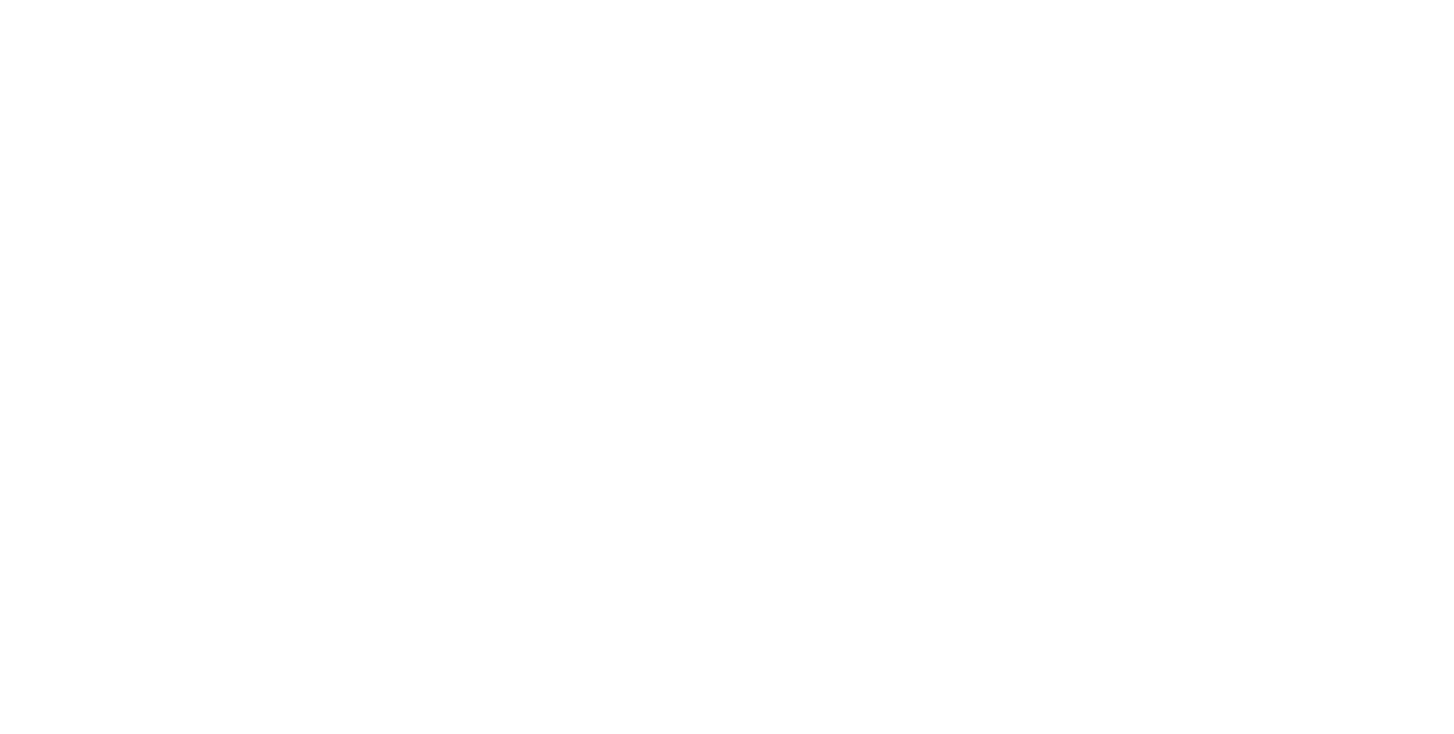

In [31]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

stars_nonvar = stars[pd.isnull(stars['var'])]
stars_nonvar = stars_nonvar[stars_nonvar['color'] != '#000000']
print(len(stars_nonvar), 'non-variable stars to plot')

for index, row in stars_nonvar.iterrows(): 
    try:
        ax.scatter(row['ra']*360/24, row['dec'], transform=ccrs.Geodetic(),
           s=(6.5-row['mag'])*5, color=row['color'], lw=0, edgecolor='none', 
           alpha=min(1, ((6.5-row['mag'])*5)/(6.5*5)), zorder=6.5-row['mag'])

    except:
        print(row['ra'], row['dec'], row['mag'], row['color'])
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/star_fills.png')

7723 non-variable stars to plot
0.0053 -44.290561 6.28 #FFD423
0.006638 26.918108 6.43 #d4bf94
0.008593 59.559679 6.18 #FFD423
0.009533 -53.097713 6.49 #FFD423
0.017941 -48.809876 5.71 #FFD423
0.022013 49.981558 6.22 #FFD423
0.022255 -50.337373 5.53 #FF2620
0.026616 -77.065724 4.78 #F99220
0.026949 61.222801 5.58 #d4bf94
0.027597000000000003 73.611846 6.5 #f3e8d3
0.028847 42.367144 6.25 #93C2F1
0.030402 -3.027504 5.13 #93C2F1
0.036139 27.082256 5.8 #FFD423
0.038867 -29.720414 5.04 #93C2F1
0.040046 8.956824000000003 6.33 #f3e8d3
0.041584 8.485463000000001 5.7 #d4bf94
0.043357 66.098966 5.87 #FFD423
0.049301 -20.045882 6.25 #d4bf94
0.052180999999999984 -24.145145 6.46 #F99220
0.06233 -17.335988 4.55 #93C2F1
0.070462 62.287664 5.9 #f3e8d3
0.07216499999999999 -16.529035999999998 5.78 #F99220
0.07231 -29.268822 6.38 #f3e8d3
0.075033 -10.509523 4.99 #F99220
0.07683 42.09253 6.11 #93C2F1
0.07813099999999999 -71.436891 5.59 #93C2F1
0.078304 67.166445 5.68 #F99220
0.081573 34.659797 6.09 #FFD42

1.4517520000000002 34.377552 6.27 #d4bf94
1.456475 -22.338232 6.43 #F99220
1.460915 45.406687 4.83 #d4bf94
1.462928 -10.901582 6.13 #F99220
1.473032 7.961353 6.22 #F99220
1.49337 -21.629339 5.11 #f3e8d3
1.495226 -25.617749 6.37 #F99220
1.501695 47.007274 5.27 #F99220
1.503087 6.14382 4.84 #F99220
1.506362 -26.207851 5.92 #F99220
1.51446 66.09808699999999 6.15 #f3e8d3
1.520444 70.264604 5.82 #d4bf94
1.520851 -49.072702 3.93 #F99220
1.524725 15.345823 3.62 #FFD423
1.527502 -45.575712 6.17 #f3e8d3
1.5286799999999998 -30.283081 5.79 #F99220
1.535438 34.799962 6.39 #93C2F1
1.543438 -49.727713 6.27 #d4bf94
1.548903 -36.865231 5.49 #F99220
1.555077 8.208738 6.31 #F99220
1.557142 58.32733399999999 5.69 #F99220
1.560901 -78.50482 6.11 #FFD423
1.561899 -7.025341 5.75 #FFD423
1.563487 89.01563900000002 6.46 #f3e8d3
1.565528 59.23204000000001 4.68 #F99220
1.57716 -15.676359 5.62 #f3e8d3
1.580296 18.460512 5.9 #FF2620
1.580775 -31.892317 6.11 #F99220
1.580922 -3.523889 6.44 #F99220
1.580992 -23.699

2.717451 55.106019 5.76 #93C2F1
2.721678 3.235818 3.47 #f3e8d3
2.722287 -40.527905 6.35 #93C2F1
2.724034 -66.714252 6.23 #d4bf94
2.724198 27.707146 4.65 #93C2F1
2.724698 -2.5314520000000003 6.48 #F99220
2.730901 25.638343 6.35 #f3e8d3
2.734766 44.29704 5.43 #FFD423
2.735375 -13.858695999999998 4.24 #93C2F1
2.736273 -52.570597 6.15 #f3e8d3
2.736634 49.228448 4.1 #d4bf94
2.738642 17.763928 6.4 #F99220
2.739037 -32.524715 6.21 #f3e8d3
2.742493 15.311862 5.78 #93C2F1
2.7471330000000003 67.82463 5.95 #f3e8d3
2.749039 10.114146 4.27 #d4bf94
2.7517150000000004 -18.572563 4.47 #d4bf94
2.755807 4.711629 6.04 #d4bf94
2.757629 -63.704553 5.73 #FFD423
2.759048 -67.616617 4.83 #f3e8d3
2.779195 -21.639521 6.48 #d4bf94
2.782865 35.983523 6.27 #FFD423
2.784328 35.55468 6.28 #f3e8d3
2.786425 -22.48575 6.47 #d4bf94
2.791987 44.272198 6.45 #d4bf94
2.796568 81.448475 5.8 #FFD423
2.79848 29.247118 4.52 #F99220
2.808913 18.28379 5.83 #F99220
2.817062 -62.806521 5.25 #f3e8d3
2.818169 -32.405898 4.45 #FFD423


3.709084 -85.261964 6.4 #93C2F1
3.711871 59.969391 5.74 #F99220
3.713908 -37.313518 4.59 #F99220
3.726065 -10.485661 5.59 #f3e8d3
3.72978 19.665032 6.13 #FFD423
3.735104 -40.660289 6.45 #F99220
3.735119 48.523656 6.06 #F99220
3.736593 -64.806903 3.84 #F99220
3.741167 20.928737 6.09 #f3e8d3
3.741808 -1.163091 5.24 #93C2F1
3.742062 36.460103 5.6 #f3e8d3
3.742744 -54.274027 6.29 #F99220
3.744697 46.099813 6.1 #f3e8d3
3.746726 24.28947 5.45 #93C2F1
3.747355 -48.061299 6.49 #FFD423
3.747927 24.113339 3.72 #93C2F1
3.749027 -0.29672 5.56 #F99220
3.752705 24.83926 5.66 #93C2F1
3.753232 42.578549 3.77 #d4bf94
3.75347 24.467278 4.3 #93C2F1
3.75441 -47.359476 5.72 #F99220
3.756586 -71.658132 6.26 #93C2F1
3.760304 38.676262 6.45 #F99220
3.761234 6.049991 5.34 #93C2F1
3.763779 24.367748 3.87 #93C2F1
3.765132 24.554511 5.76 #93C2F1
3.76646 45.681899 5.66 #93C2F1
3.766907 67.201605 5.79 #d4bf94
3.767314 63.345047 4.78 #f3e8d3
3.767472 24.527898 6.43 #f3e8d3
3.769267 6.80352 5.91 #FFD423
3.774286 -29.

4.736949 40.786454 6.09 #93C2F1
4.739205 -59.732733 5.28 #f3e8d3
4.740508 11.146137 5.39 #d4bf94
4.7494190000000005 -63.229715 6.46 #F99220
4.751156 -21.283383 5.72 #F99220
4.761796 23.627996 6.34 #93C2F1
4.765406 -39.356619 6.04 #F99220
4.766786 76.611042 6.46 #d4bf94
4.76715 11.705591 5.35 #f3e8d3
4.7713410000000005 18.734693 5.99 #F99220
4.773379 -2.954532 6.33 #f3e8d3
4.779021 40.31259 5.99 #FFD423
4.797104 -30.020372 6.35 #F99220
4.8000690000000015 56.757183 5.29 #f3e8d3
4.801942 55.602611 6.32 #d4bf94
4.809037 -16.329484 5.76 #d4bf94
4.810107 -5.674045 5.77 #d4bf94
4.812396 3.5885260000000003 6.04 #F99220
4.813968 75.94121899999998 5.96 #f3e8d3
4.820235 31.437375 5.57 #F99220
4.8219650000000005 32.588190999999995 5.84 #f3e8d3
4.828402 -13.769669 6.27 #d4bf94
4.828912 15.904221 6.09 #F99220
4.830669 6.961276 3.19 #d4bf94
4.831846 37.488275 4.89 #F99220
4.83656 -16.217159 5.03 #F99220
4.837828 -41.320848 6.06 #d4bf94
4.843441 70.941528 6.36 #f3e8d3
4.843534 8.900176 4.35 #f3e8d3
4.

5.507268 15.360449 5.93 #f3e8d3
5.51204 22.462255 6.29 #F99220
5.512522 39.825916 6.38 #FFD423
5.51307 5.948139 4.2 #93C2F1
5.513514 41.461994 5.99 #F99220
5.518785 -20.863659 5.53 #f3e8d3
5.520209 -35.470519 3.86 #F99220
5.520703 3.292133 5.46 #93C2F1
5.522469999999998 -6.708378999999999 6.23 #93C2F1
5.5266660000000005 -45.925317 5.86 #F99220
5.530002 85.938528 6.5 #f3e8d3
5.531318 -76.340964 5.18 #F99220
5.532183 -7.301537 4.62 #93C2F1
5.537262 17.058128 5.5 #93C2F1
5.542707 57.221071 6.44 #d4bf94
5.543883 0.011933 6.15 #F99220
5.54482 -1.591831 5.34 #93C2F1
5.545465 32.192021999999994 4.71 #93C2F1
5.545504 -17.822289 2.58 #d4bf94
5.547613 -38.513371 5.45 #F99220
5.549873000000002 -64.227517 5.34 #FFD423
5.552049 -35.139376 5.75 #F99220
5.5576120000000016 32.80118 6.5 #f3e8d3
5.560616 34.725570000000005 6.27 #f3e8d3
5.560788 20.474216 6.19 #93C2F1
5.562315 -54.902289 6.42 #d4bf94
5.565079 14.305578 5.6 #93C2F1
5.567353 -7.02375 6.45 #F99220
5.567747 -1.035726 6.24 #93C2F1
5.567791000

6.5764809999999985 -32.716255 5.62 #93C2F1
6.5795330000000005 7.572482000000001 6.44 #f3e8d3
6.58294 -52.975607 4.35 #93C2F1
6.5842740000000015 -22.964793 4.54 #f3e8d3
6.586684 28.022314 5.26 #f3e8d3
6.5877300000000005 0.890216 5.78 #93C2F1
6.588221000000001 9.988335 5.93 #F99220
6.590061 -36.779879 5.59 #f3e8d3
6.591894 -22.109053 6.32 #F99220
6.598344 -36.088632 6.36 #d4bf94
6.606347 -18.659904 5.71 #FFD423
6.609814 -5.211143 5.52 #93C2F1
6.6113990000000005 -19.255879 3.95 #F99220
6.6129440000000015 -13.321036 5.95 #F99220
6.614242999999999 -41.557141 6.36 #F99220
6.617191 -38.146506 6.03 #F99220
6.62051 -36.990651 5.72 #93C2F1
6.624247 24.590851 6.44 #f3e8d3
6.626915 10.853293 6.39 #F99220
6.627332000000001 56.85753100000001 5.87 #f3e8d3
6.6278679999999985 2.704158 6.17 #F99220
6.627998 -12.985116 6.11 #F99220
6.6282 61.481233 5.94 #FFD423
6.628528 16.399252 1.93 #f3e8d3
6.629353 -43.195934 3.17 #93C2F1
6.6298910000000015 -32.339735 5.25 #F99220
6.6313070000000005 4.95667 6.14 #93C2

7.238906 3.111414 5.36 #F99220
7.241181 -10.316245 6.02 #93C2F1
7.242395 12.115824 5.71 #FFD423
7.243927999999999 -48.27192700000001 4.75 #93C2F1
7.244992999999999 24.884984 5.84 #FF2620
7.247546000000002 -27.037996000000003 5.58 #F99220
7.249209 -41.426394 5.95 #93C2F1
7.255391 -0.16128299999999998 6.42 #FFD423
7.2558539999999985 -30.686447 5.36 #93C2F1
7.255901 -52.499226 5.96 #F99220
7.260953 7.977742 5.78 #FF2620
7.262011 -10.583605 5.95 #F99220
7.263138 -23.74028 6.34 #f3e8d3
7.263925 47.239964 5.54 #FFD423
7.265267 59.637467 5.2 #F99220
7.26588 27.897419 5.75 #FF2620
7.27071 -15.585689000000002 5.46 #f3e8d3
7.270964999999999 -46.774533 5.64 #F99220
7.275514999999999 -38.318928 5.81 #93C2F1
7.276387 -27.881179 4.66 #FF2620
7.276897999999999 -23.315594 4.83 #F99220
7.277322 -23.31094 6.02 #f3e8d3
7.280392 -36.592633 5.03 #93C2F1
7.280508 -67.95715200000001 3.97 #d4bf94
7.28256 -30.897012 6.3 #f3e8d3
7.284277 26.689485 6.38 #FFD423
7.292128999999999 -6.679997 6.29 #F99220
7.2927 52.

7.824669 -13.352948 6.23 #93C2F1
7.825642999999999 12.81425 6.42 #F99220
7.826502 -33.28895 5.61 #FF2620
7.827771 -14.085359 6.34 #F99220
7.82799 -19.505518 6.49 #F99220
7.828053999999999 -66.19597399999999 5.78 #93C2F1
7.828111 -17.228407999999998 5.17 #F99220
7.834908 -19.523548 6.11 #F99220
7.836271000000001 -9.183441 5.6 #F99220
7.839957000000001 -50.509468 5.89 #F99220
7.845142 -44.579945 6.45 #FFD423
7.8464990000000014 3.277253 6.17 #F99220
7.847527 4.459514 6.49 #FFD423
7.848175 0.07955599999999999 6.38 #F99220
7.848677 -11.128602 6.16 #F99220
7.850022 -24.528557 6.43 #93C2F1
7.8506550000000015 33.233653000000004 6.06 #f3e8d3
7.851591 54.12924 6.03 #d4bf94
7.8542619999999985 37.082085 6.49 #F99220
7.85565 -43.095232 6.34 #93C2F1
7.861358 -12.819405 6.37 #d4bf94
7.861663 1.766868 5.12 #93C2F1
7.861952 -21.173662 5.62 #F99220
7.862862 -13.898029 5.16 #FFD423
7.865771 19.325085 6.03 #F99220
7.867742999999999 45.932989 6.5 #f3e8d3
7.870288 -40.575786 3.71 #FFD423
7.871024 -34.705442

9.032774 -0.482673 5.64 #F99220
9.03511 -39.402164 6.25 #F99220
9.040777 -66.39607600000001 4.0 #f3e8d3
9.04242 67.62961899999999 4.74 #FF2620
9.045629 24.452915 5.45 #f3e8d3
9.045783 7.298267 5.85 #F99220
9.051483 -53.550372 6.39 #93C2F1
9.060427 47.156525 3.57 #f3e8d3
9.066778 54.283887 5.74 #f3e8d3
9.068273 -47.44145 6.46 #93C2F1
9.069248 -47.097737 3.75 #F99220
9.079995 -57.852573 6.43 #f3e8d3
9.081968 32.376833000000005 6.46 #f3e8d3
9.085785 -72.602705 4.47 #d4bf94
9.090028 48.530314 5.48 #d4bf94
9.099546 5.092316 4.99 #F99220
9.102117 -64.499849 6.37 #F99220
9.108825 38.452215 4.56 #FFD423
9.109454 -55.802411 6.1 #93C2F1
9.111986 59.34452 6.44 #f3e8d3
9.11665 1.4626940000000002 6.16 #FF2620
9.124143 22.980872 6.39 #d4bf94
9.133348 29.654235 5.42 #FFD423
9.134133 -25.858536 4.62 #F99220
9.13449 32.540399 6.47 #d4bf94
9.139867 66.873235 5.15 #F99220
9.14505 -8.589524 5.6 #93C2F1
9.145426 -26.767598 6.15 #f3e8d3
9.145701 -16.277321 6.48 #F99220
9.146483 26.629112 5.95 #FFD423
9.1475

9.773225 1.785586 5.65 #d4bf94
9.775104 -44.75506 5.58 #93C2F1
9.785036 -65.072007 2.92 #f3e8d3
9.788366 79.13668 6.09 #d4bf94
9.789499 23.647686 6.49 #F99220
9.790546 11.568165 6.44 #f3e8d3
9.80981 46.021008 5.08 #FFD423
9.811118 -56.41189 6.05 #F99220
9.824471 -37.186765 5.95 #F99220
9.830582 21.179422 6.1 #f3e8d3
9.830931 -36.268463 6.36 #F99220
9.832541 -45.732736 5.09 #93C2F1
9.839898 65.593226 6.27 #f3e8d3
9.841689 4.34365 6.24 #d4bf94
9.844985 -46.933923 5.72 #F99220
9.848775 -62.745116 5.56 #F99220
9.850222 -80.061059 6.47 #93C2F1
9.850551 13.066239 6.45 #FF2620
9.853347 -59.425774 5.79 #F99220
9.853898 -4.24335 6.01 #f3e8d3
9.855481 -46.193871 5.62 #F99220
9.856005 -6.181928 6.42 #d4bf94
9.85797 -14.846603 4.11 #FFD423
9.861298 -46.54762 4.58 #FFD423
9.861449 -11.340507 6.48 #FF2620
9.864732 24.395369 5.29 #f3e8d3
9.866537 -16.534775 6.08 #F99220
9.868433 54.06433199999999 4.55 #f3e8d3
9.869996 0.07561 6.34 #FFD423
9.870045 2.4541310000000003 6.02 #f3e8d3
9.875121 -8.105030000

10.605706 -59.56439200000001 5.08 #F99220
10.605949 36.32692700000001 6.29 #d4bf94
10.608994 -12.230121 5.71 #d4bf94
10.620481 -27.412634000000004 4.87 #FF2620
10.621144 -53.85526 6.43 #93C2F1
10.621717 -48.22562 3.84 #f3e8d3
10.631185 34.078623 6.42 #F99220
10.643043 -16.876572 4.91 #FFD423
10.645337 31.976237 4.68 #FFD423
10.645834 -59.182997 4.69 #F99220
10.645941 -59.26242 6.5 #93C2F1
10.64731 -42.753443 6.1 #f3e8d3
10.647337 -12.443618 6.04 #f3e8d3
10.649906 -58.816854000000006 5.96 #FF2620
10.651581 53.6683 5.55 #F99220
10.65213 37.91 5.84 #d4bf94
10.654424 -74.49338399999998 6.08 #F99220
10.655112 -55.60326800000001 4.29 #FFD423
10.656346 -64.111788 6.33 #93C2F1
10.680984 -35.741718 6.36 #FFD423
10.690052 -1.741491 6.25 #F99220
10.696747 68.443499 5.74 #F99220
10.69908 65.71628 5.12 #F99220
10.708715 -13.974514 6.24 #F99220
10.711997 -32.715672999999995 5.63 #f3e8d3
10.715949 -64.39445 2.74 #93C2F1
10.717191 26.325577000000006 5.51 #f3e8d3
10.717789 69.07621400000001 5.01 #F9922

11.546538 -7.8275229999999985 5.94 #F99220
11.546693 -40.436194 5.64 #FF2620
11.54837 -31.087226 5.13 #FF2620
11.550038 -31.857625 3.54 #FFD423
11.554117 -16.280381 6.05 #d4bf94
11.560096 2.499034 6.49 #F99220
11.560337 -40.586637 5.39 #f3e8d3
11.565639 36.815614 6.38 #F99220
11.572764 3.060165 5.76 #d4bf94
11.574878 -32.831340000000004 5.96 #F99220
11.57847 16.796915 5.95 #93C2F1
11.579355 -54.264091 4.62 #93C2F1
11.582473 -49.13649 5.5 #F99220
11.583029 -4.3612910000000005 6.43 #F99220
11.584377 20.441545 6.45 #FFD423
11.584695 54.785419 5.63 #F99220
11.595094 -61.28787 6.23 #f3e8d3
11.596363 -63.01984100000001 3.11 #93C2F1
11.598771 -47.641643 5.26 #f3e8d3
11.600744 69.322952 5.19 #F99220
11.604987 27.781351 5.8 #d4bf94
11.606215 -61.05243299999999 5.84 #93C2F1
11.609706 -33.570057 5.71 #F99220
11.611313 -37.237187 6.3 #f3e8d3
11.611365 -9.802247 4.7 #93C2F1
11.615814 -0.823749 4.3 #FFD423
11.616852 -61.283442 5.14 #F99220
11.617005 -32.988184000000004 6.32 #d4bf94
11.621074 -75.896

12.440107 71.929827 6.33 #FFD423
12.442158 -51.450635 4.82 #93C2F1
12.443311 -63.09909200000001 0.77 #93C2F1
12.44676 -48.913191 6.25 #FFD423
12.447692 -32.830121000000005 5.56 #93C2F1
12.448966 28.268423 4.35 #F99220
12.449805 26.825699 4.98 #f3e8d3
12.456899 -63.788986 6.02 #93C2F1
12.45801 -58.316445 6.35 #F99220
12.459754 55.712724 5.68 #FF2620
12.461689 8.610344 6.36 #FFD423
12.463735 -16.631844 6.3 #FFD423
12.467331 -50.230635 3.91 #93C2F1
12.472025 -64.34098900000001 6.05 #f3e8d3
12.472908 -39.041172 5.45 #93C2F1
12.473805 -61.794842 6.21 #F99220
12.476029 -56.407816 6.15 #F99220
12.490845 24.108925 5.47 #d4bf94
12.495344 20.896109 5.68 #f3e8d3
12.497739 -16.515432 2.94 #93C2F1
12.498388 -56.52494 5.78 #FF2620
12.499267 58.405742 5.37 #f3e8d3
12.500815 51.535631 6.21 #d4bf94
12.501178 58.767773 6.07 #FFD423
12.501327 -13.393184 6.37 #FFD423
12.504846 -23.696419 5.63 #FF2620
12.513925 53.07660799999999 6.2 #d4bf94
12.519429 -57.113212 1.59 #FF2620
12.522616 7.604309 6.05 #F99220


14.406157 -82.84825 6.42 #93C2F1
14.411339000000002 -44.311134 6.43 #F99220
14.411348 -11.669703 6.49 #d4bf94
14.413507999999998 -24.80631 5.34 #F99220
14.418426 -68.19533299999999 5.56 #f3e8d3
14.419967000000002 51.850744 4.04 #d4bf94
14.421554 -13.353163 6.49 #F99220
14.424764 38.393053 6.28 #F99220
14.427716 -66.172922 6.36 #f3e8d3
14.429935999999998 -26.852241 6.48 #F99220
14.436336 -45.379276 4.33 #f3e8d3
14.437074 -42.318597 6.33 #F99220
14.440935 19.2269 5.4 #d4bf94
14.447188 -39.873989 6.36 #93C2F1
14.448801 -83.667884 4.31 #F99220
14.451973 -65.821646 5.87 #F99220
14.453392 -46.134254 5.83 #f3e8d3
14.456774 -6.120332 6.18 #f3e8d3
14.458758 75.695993 4.25 #F99220
14.469564000000002 -29.491638 4.97 #93C2F1
14.470038 -2.227957 4.81 #FFD423
14.471234 36.197028 6.22 #F99220
14.477197 49.844851 5.58 #FFD423
14.478256 -6.900536 5.42 #F99220
14.47875 -59.197548 6.46 #f3e8d3
14.481087 -47.992086 6.4 #f3e8d3
14.493549 41.795911 6.36 #FFD423
14.493626999999998 -76.729083 6.06 #F99220
14.

15.395475 -1.022384 6.11 #d4bf94
15.397844 -12.369501 5.72 #FFD423
15.401422 45.271031 6.07 #F99220
15.403303 -10.322266 4.92 #d4bf94
15.408181 37.377167 4.31 #d4bf94
15.412504 -39.710268 5.36 #f3e8d3
15.415494 58.966065 3.29 #F99220
15.422285 -38.73362 4.6 #f3e8d3
15.429832 15.428036 5.16 #FF2620
15.431464000000002 19.480707 6.26 #FFD423
15.437389 -68.309167 5.89 #F99220
15.438166 34.335996 5.46 #F99220
15.442273000000002 54.02029399999999 6.44 #f3e8d3
15.455037 -36.76756 5.46 #93C2F1
15.460798 25.101626 6.01 #FF2620
15.464287 60.670217 5.9 #F99220
15.470947 -16.716484 5.64 #F99220
15.474225 -51.597934 6.1 #FFD423
15.477288 1.842081 5.15 #f3e8d3
15.478999 47.201514 6.15 #f3e8d3
15.482451 55.194937 6.45 #f3e8d3
15.482962 -28.866891 6.43 #FFD423
15.486699 16.395618 6.38 #FFD423
15.488688 -38.634999 6.44 #d4bf94
15.489198000000002 62.099529 6.32 #F99220
15.490075 -46.732704 5.26 #F99220
15.505915 -41.919027 6.23 #93C2F1
15.506325 31.285932 6.45 #f3e8d3
15.51007 -20.728553 6.2 #f3e8d3
15.

16.633765 -6.538014 6.05 #f3e8d3
16.645794 48.928342 4.86 #FF2620
16.646591 -8.61861 6.44 #F99220
16.647973999999998 -60.990402 6.16 #93C2F1
16.651452 -37.21737 5.93 #93C2F1
16.660869 -9.554589 6.33 #d4bf94
16.676254999999998 -20.408649 6.25 #F99220
16.677413 4.219789 5.77 #f3e8d3
16.68068 -60.44644200000001 6.17 #d4bf94
16.680928 12.395043 6.08 #f3e8d3
16.681978 64.589046 4.84 #F99220
16.682336 -8.309628 6.47 #F99220
16.683495999999998 24.858705 6.07 #F99220
16.68654 -1.000312 6.25 #f3e8d3
16.687982 1.245444 6.4 #F99220
16.688113 31.602726 2.81 #d4bf94
16.689004 -48.762957 5.57 #5A90C3
16.689756 -68.296123 5.89 #93C2F1
16.692884 -17.742167000000006 4.91 #FFD423
16.693384 -24.467962 6.07 #f3e8d3
16.693527 26.91688 5.92 #d4bf94
16.694507 -49.651552 5.62 #93C2F1
16.695134 1.181231 5.74 #d4bf94
16.695960999999997 -33.145759000000005 5.84 #FFD423
16.698247 -19.924377 5.55 #d4bf94
16.707714000000006 49.936441 6.48 #d4bf94
16.708082 -37.07935300000001 6.47 #FFD423
16.71345 -62.55393100000001

17.423358 52.790684 6.46 #FFD423
17.428155 60.048398 5.65 #f3e8d3
17.432743 -1.651777 6.44 #d4bf94
17.433344 -50.63351 5.19 #F99220
17.433574 26.878734 6.38 #f3e8d3
17.434677999999998 58.651895 6.49 #f3e8d3
17.438614 7.59565 6.01 #f3e8d3
17.439504 -24.175309 4.16 #f3e8d3
17.441910999999998 4.14036 4.34 #F99220
17.443856 -5.086596 4.53 #d4bf94
17.445623 48.260065 5.83 #f3e8d3
17.446153 34.695802 5.94 #f3e8d3
17.44698 20.080977 5.52 #93C2F1
17.447772 -45.84303 5.28 #93C2F1
17.448694 -25.943462 6.42 #93C2F1
17.448987 -51.948819 6.17 #93C2F1
17.450597 -12.512488 6.2 #d4bf94
17.452745 -15.85336 6.48 #F99220
17.453462 -50.63037 5.9 #93C2F1
17.455909 -29.867033000000006 4.28 #d4bf94
17.460431 -29.724567 5.98 #93C2F1
17.466002 -52.297168 5.72 #F99220
17.467316 -8.208374000000001 6.37 #d4bf94
17.468853 -63.03624 6.22 #93C2F1
17.477476 -55.169686 5.93 #FFD423
17.48046 0.330625 5.41 #f3e8d3
17.482247 -36.77828 5.98 #F99220
17.483573 -43.973919 6.3 #93C2F1
17.490447 -38.51692 6.38 #f3e8d3
17.49648

18.405067000000006 -44.110256 5.24 #93C2F1
18.409202 -49.652879 6.45 #FFD423
18.411702 -7.075936 6.28 #F99220
18.415891 -1.579413 6.15 #d4bf94
18.416239 27.394783 6.27 #f3e8d3
18.417066 -30.75657 5.58 #F99220
18.422511 -20.541679 4.81 #f3e8d3
18.422688 -35.992025 6.14 #F99220
18.431835 -33.945718 6.3 #93C2F1
18.432996 29.82893 5.81 #f3e8d3
18.433069 65.56348 4.82 #F99220
18.444702 26.449216 6.5 #93C2F1
18.448336 -48.117243 5.44 #F99220
18.449561 -45.968459 3.49 #93C2F1
18.452463 -8.040405999999999 6.5 #F99220
18.4617 59.549112 6.43 #F99220
18.462154 -26.634845 6.31 #f3e8d3
18.463745 -29.816865000000004 5.9 #d4bf94
18.463978 3.74857 6.07 #F99220
18.465689 -17.800357 6.19 #93C2F1
18.466179 -25.4217 2.82 #F99220
18.466326 6.194104 5.71 #93C2F1
18.46838 -26.757245 6.28 #f3e8d3
18.468432 -84.38725600000002 6.49 #93C2F1
18.474198 -38.995671 5.63 #f3e8d3
18.480505 -49.070588 4.1 #FFD423
18.486626 -14.565813 4.67 #f3e8d3
18.486909 -43.845939 6.36 #FFD423
18.488891 -80.232708 5.95 #F99220
18.49

19.11567 -27.670423 3.32 #F99220
19.121703 36.100157 5.25 #93C2F1
19.123769 32.501738 5.2 #d4bf94
19.125234 -28.6368 6.05 #F99220
19.132589000000007 16.853385 6.08 #FFD423
19.134311 21.698927 6.22 #d4bf94
19.137378 -24.657369 6.3 #93C2F1
19.139156 -40.496703 4.57 #F99220
19.147861 -55.720425 6.44 #F99220
19.149976 6.073207 5.23 #d4bf94
19.152716 76.560502 5.11 #f3e8d3
19.157869 -37.904474 4.11 #f3e8d3
19.161043 -39.827238 6.44 #F99220
19.162723 65.978513 6.26 #f3e8d3
19.162731 -21.023615 2.88 #d4bf94
19.163374 -19.803657 6.11 #F99220
19.164332 -0.4281140000000001 6.34 #93C2F1
19.164642 -68.424448 5.31 #FFD423
19.166015 -41.892256 5.86 #93C2F1
19.167154 -39.34079600000001 4.1 #F99220
19.183863 -39.004705 6.34 #93C2F1
19.188559 -29.502293 6.28 #93C2F1
19.189767 40.429095 6.2 #f3e8d3
19.191939 26.735871000000003 6.35 #d4bf94
19.194597 56.859213 5.13 #FFD423
19.201416 49.855755 5.85 #FFD423
19.207788 -21.658382 6.39 #F99220
19.209225 67.661541 3.07 #FFD423
19.210204 21.554572 6.02 #f3e8d3


20.130658 9.399833 6.43 #d4bf94
20.13384 -0.678185 5.97 #F99220
20.135988 -52.577795 6.47 #FFD423
20.139021 -66.354691 6.45 #F99220
20.143966 10.725867 6.34 #93C2F1
20.145157 -66.182068 3.55 #FFD423
20.148145 77.71141899999998 4.38 #93C2F1
20.151066 -47.06793 6.46 #F99220
20.156212 56.026828 6.49 #F99220
20.175982 26.904169 5.51 #f3e8d3
20.184317 21.134579 6.24 #F99220
20.185395 -57.524239 6.36 #f3e8d3
20.186632 -36.101212 5.32 #F99220
20.188413 -0.8214610000000001 3.24 #93C2F1
20.189171 21.874937 6.24 #93C2F1
20.193007 62.07854200000001 5.7 #d4bf94
20.19666 26.80899 5.51 #F99220
20.199416 -12.392403 6.34 #F99220
20.200195 26.478806 5.91 #93C2F1
20.206624 -42.780063 6.2 #F99220
20.207186 -12.617497 5.84 #d4bf94
20.208812 51.463565 6.01 #F99220
20.209757 0.8670540000000001 6.25 #f3e8d3
20.217894 -0.330796 6.47 #F99220
20.220523 -1.009339 5.44 #F99220
20.22168 46.815675 4.8 #f3e8d3
20.223288 56.567722 4.28 #f3e8d3
20.224331 60.64056899999999 5.81 #F99220
20.22566 -47.713234 6.47 #F99220


20.883653 -23.783203 6.32 #F99220
20.884888 -11.573659 6.38 #FFD423
20.88538 29.649097 6.36 #F99220
20.887431 44.38726 4.8 #93C2F1
20.88849 45.181673 5.48 #F99220
20.890266 -30.718954 6.35 #F99220
20.894494 -39.809865 5.34 #F99220
20.898304 33.437891 5.47 #F99220
20.899552 -6.889461 6.44 #d4bf94
20.901825 -27.925239 6.41 #FF2620
20.909344 28.057621 5.03 #F99220
20.909751 -50.727341 6.23 #93C2F1
20.912304 75.92557 5.99 #FFD423
20.913283 -17.922894 5.78 #F99220
20.913498 -58.45415500000001 3.67 #F99220
20.926858 13.721536 5.19 #F99220
20.927381 12.568558 5.54 #f3e8d3
20.927966 4.532723000000002 6.04 #FFD423
20.930501 47.417656 5.68 #93C2F1
20.938058 56.887519 6.23 #93C2F1
20.940407 50.728598 5.83 #d4bf94
20.940526 49.195847 5.92 #FFD423
20.942994 44.924722 5.96 #5A90C3
20.946479 -26.296378000000004 5.7 #d4bf94
20.948341 -9.697545 5.49 #F99220
20.952893 41.167136 3.94 #f3e8d3
20.952938 0.463779 6.06 #F99220
20.96129 -16.031539000000002 5.89 #f3e8d3
20.971209 22.325908 5.3 #F99220
20.97206

22.018152 13.119823 5.61 #d4bf94
22.019232 8.257164 5.65 #F99220
22.030718 52.88225300000001 5.79 #93C2F1
22.031289 -77.662544 6.39 #f3e8d3
22.033715 10.973806 6.36 #93C2F1
22.036625 -17.903474 6.28 #F99220
22.051044 -76.118427 5.94 #d4bf94
22.054572 -6.522406 5.55 #F99220
22.055486 -56.785977 4.69 #F99220
22.055287 11.386552 5.83 #93C2F1
22.063135 64.627971 4.26 #f3e8d3
22.073288 -29.91653 6.45 #F99220
22.076255 32.941744 6.36 #FFD423
22.079839 -0.906343 5.29 #f3e8d3
22.083469 62.785671 5.27 #F99220
22.084295 14.815918 6.38 #FF2620
22.085775 62.279814 5.07 #5A90C3
22.086481 26.673689000000003 5.75 #F99220
22.092964 28.963981 5.69 #93C2F1
22.094653 5.05853 4.86 #F99220
22.096399 -0.319851 2.95 #FFD423
22.097346 45.112504 6.5 #f3e8d3
22.097496 -59.636072 5.62 #F99220
22.100543 45.014348 5.09 #F99220
22.101914 -39.543353 4.47 #FF2620
22.103405 45.24869 6.19 #f3e8d3
22.107286 -13.869679 4.29 #93C2F1
22.116847 25.345112 3.77 #d4bf94
22.119345000000006 58.840718 6.34 #FFD423
22.123774 53.30

22.910981 -70.073709 6.04 #FFD423
22.912632 -16.271957 5.53 #F99220
22.916524 1.064904 6.11 #f3e8d3
22.917399 37.076827 5.91 #d4bf94
22.919711 -4.987899 5.72 #F99220
22.920464000000006 8.816166 4.91 #f3e8d3
22.920805 -36.388579 6.4 #F99220
22.925165 -20.139404000000006 6.36 #F99220
22.929029 36.35139 5.73 #93C2F1
22.930982 -31.633231 6.09 #F99220
22.932472 -32.539628 4.2 #FFD423
22.940555 49.733544 4.99 #F99220
22.946613 -47.96922100000001 5.72 #f3e8d3
22.954777 -4.810095 6.31 #FFD423
22.95777 20.768832 5.45 #FFD423
22.959112 3.810241 6.28 #F99220
22.960838 -29.622236 1.17 #f3e8d3
22.961316 39.308777 6.17 #93C2F1
22.970984 -2.395385 6.17 #FFD423
22.973239000000003 -1.410209 6.38 #d4bf94
22.976411 9.356859 6.43 #FFD423
22.976391 -35.523231 6.15 #d4bf94
22.978507 7.340074 6.35 #f3e8d3
22.985834 59.814655 6.46 #93C2F1
22.986209 52.65453 6.31 #F99220
22.986615 11.728844 5.76 #f3e8d3
22.99096 0.962927 5.43 #F99220
22.993243 -13.070895 6.12 #F99220
23.001607 -25.16418 5.66 #F99220
23.006843 

<ipython-input-3-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-3-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


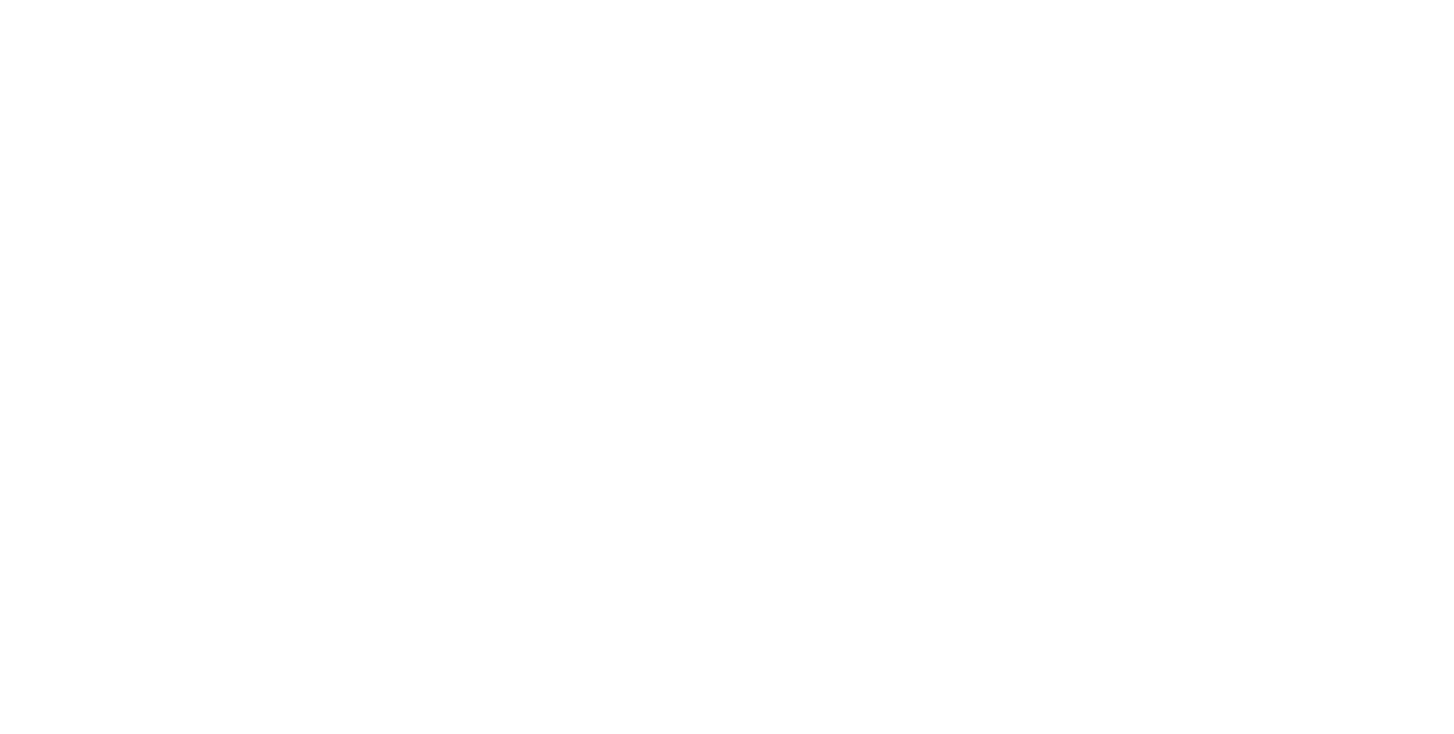

In [8]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

stars_nonvar = stars[pd.isnull(stars['var'])]
print(len(stars_nonvar), 'non-variable stars to plot')

for index, row in stars_nonvar.iterrows(): 
    try:
        ax.scatter(row['ra']*360/24, row['dec'], transform=ccrs.Geodetic(), alpha=1,
           s=(6.5-row['mag'])*5, edgecolor=row['color'], lw=0.5, color='k', zorder=6.5-row['mag'])
    except:
        print(row['ra'], row['dec'], row['mag'], row['color'])
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/star_lines.png')

In [9]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))
ax.set_global()
ax.background_patch.set_fill(False)

stars_var = stars[pd.notnull(stars['var'])]
print(len(stars_var), 'variable stars to overplot')

for index, row in stars_var.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], u"\u16BC", transform=ccrs.Geodetic(),
            fontproperties=prop_seguihis, fontsize=(12-row['mag']), 
            alpha=max(0.1, min(1,((6.5-row['mag'])*5)/(6.5*5))), color=row['color'], ha='center', va='center')
    
ax.set_xlim(ax.get_xlim()[::-1])
ax.axis('off')
set_save_image(fig, './figures/variable_stars.png')

<ipython-input-9-0828868baf97>:4: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


1189 variable stars to overplot


<ipython-input-3-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-3-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


FileNotFoundError: [Errno 2] No such file or directory: 'Users\x0biktorialubomski\\Library\\Fonts\\seguihis.ttf'

FileNotFoundError: [Errno 2] No such file or directory: 'Users\x0biktorialubomski\\Library\\Fonts\\seguihis.ttf'

<Figure size 1440x720 with 1 Axes>

In [10]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

for index, row in messiers.iterrows(): 
    if row['code'] in [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb"]:
        fontprop = prop_seguihis
    else: 
        fontprop = prop_seguisym
    ax.text(row['ra']*360/24, row['dec'], row['code'], transform=ccrs.Geodetic(), alpha=0.5,
          fontsize=12, color=other_color, ha='center', va='center', fontproperties=fontprop)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/messier_ngcs.png')

<ipython-input-3-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-3-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


FileNotFoundError: [Errno 2] No such file or directory: 'Users\x0biktorialubomski\\Library\\Fonts\\seguihis.ttf'

FileNotFoundError: [Errno 2] No such file or directory: 'Users\x0biktorialubomski\\Library\\Fonts\\seguihis.ttf'

<Figure size 1440x720 with 1 Axes>

In [11]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Key for non-star object codes
codes = messiers.drop_duplicates(subset='type', keep='first')
codes.reset_index(inplace=True)
for index, row in codes.iterrows(): 
    if row['code'] in [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb"]:
        fontprop = prop_seguihis
    else: 
        fontprop = prop_seguisym
    ax.text(0, index, row['code']+" "+row['type'], alpha=1, fontsize=12, 
            color=other_color, ha='left', va='center', fontproperties=fontprop)
    
# Keys for star sizes
mags = np.arange(0, 6.55, 0.5)
for index, mag in enumerate(mags): 
    # Numbers
    if index % 2 == 0:
        ax.text(2+index/15, 2, mag, ha='center', va='center')
    
    # Key for variable star sizes
    ax.text(2+index/15, 0, u"\u16BC", fontproperties=prop_seguihis, fontsize=(12-mag), 
            alpha=max(0.1, min(1,((6.5-mag)*5)/(6.5*5))), color='k', ha='center', va='center')

    # Key for normal star sizes
    ax.scatter(2+index/15, 1, s=(6.5-mag)*5, color='k', lw=0, edgecolor='none', 
               alpha=min(1, ((6.5-mag)*5)/(6.5*5)))
    ax.scatter(2+index/15, 1, alpha=1, s=(6.5-mag)*5, edgecolor='k', lw=0.5, facecolor='none')

# Key for colors
cols = stars.drop_duplicates(subset='color', keep='first')
cols.reset_index(inplace=True)
for index, row in cols.iterrows(): 
    ax.scatter(3.5, index/2, s=6.5*5, lw=0.5, 
               edgecolor=row['linecolor'], color=row['color'])
    ax.text(3.6, index/2, row['spect_desig'], ha='left', va='center', color=row['color'])

# Key to zodiac colors
ax.plot([5, 6], [0, 0], color=zodiac_color, lw=0.5)
ax.plot([5, 6], [1, 1], color=nonzodiac_color, lw=0.5)
ax.plot([5, 6], [2, 2], color=const_color, lw=0.5)

# Key for colors
cols = stars.drop_duplicates(subset='greek_letters', keep='first')
cols.reset_index(inplace=True)
letterlist = cols['greek_letters'].tolist()
letterlist = [x for x in letterlist if len(str(x)) == 1]
letterlist = " ".join(letterlist)
ax.text(4, 4, letterlist, ha='left', va='center', color=row['color'])

ax.set_xlim(0, 10)
ax.set_ylim(-1, 20)
set_save_image(fig, './figures/key.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'Users\x0biktorialubomski\\Library\\Fonts\\seguihis.ttf'

FileNotFoundError: [Errno 2] No such file or directory: 'Users\x0biktorialubomski\\Library\\Fonts\\seguihis.ttf'

<Figure size 1440x720 with 1 Axes>

<ipython-input-12-478a0e11f609>:6: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)
<ipython-input-3-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-3-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


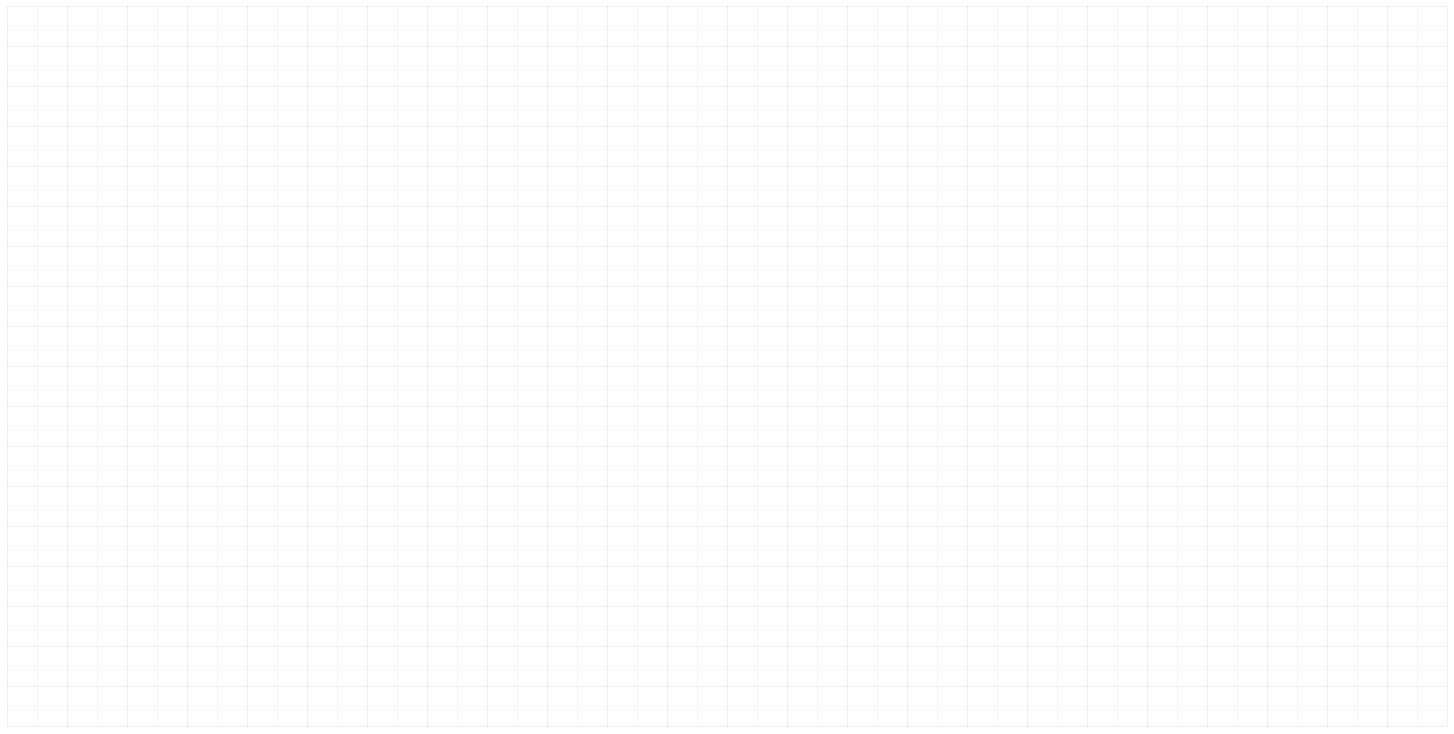

In [12]:
savename = './figures/gridlines.png'

fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.background_patch.set_fill(False)

lon_large = np.arange(-180, 181, 1*360/24)
lon_small = np.arange(-180, 181, 0.5*360/24)
lat_large = np.arange(-90, 91, 10)
lat_small = np.arange(-90, 91, 5)
lat_delim = np.arange(-90, 90.01, 0.1)
lon_delim = np.arange(-180, 180.01, 0.1)

for lg in lat_large: 
    ax.plot(lon_delim, [lg]*len(lon_delim), transform=ccrs.PlateCarree(), 
            color='k', lw=0.25, alpha=0.25, clip_on=False)
for sm in lat_small: 
    if sm not in lat_large: 
        ax.plot(lon_delim, [sm]*len(lon_delim), transform=ccrs.PlateCarree(), 
                color='k', lw=0.125, alpha=0.25, clip_on=False)
for lg in lon_large: 
    ax.plot([lg]*len(lat_delim), lat_delim, transform=ccrs.PlateCarree(), 
            color='k', lw=0.25, alpha=0.25, clip_on=False)
for sm in lon_small: 
    if sm not in lon_large: 
        ax.plot([sm]*len(lat_delim), lat_delim, transform=ccrs.PlateCarree(), 
                color='k', lw=0.125, alpha=0.25, clip_on=False)

set_save_image(fig, savename)

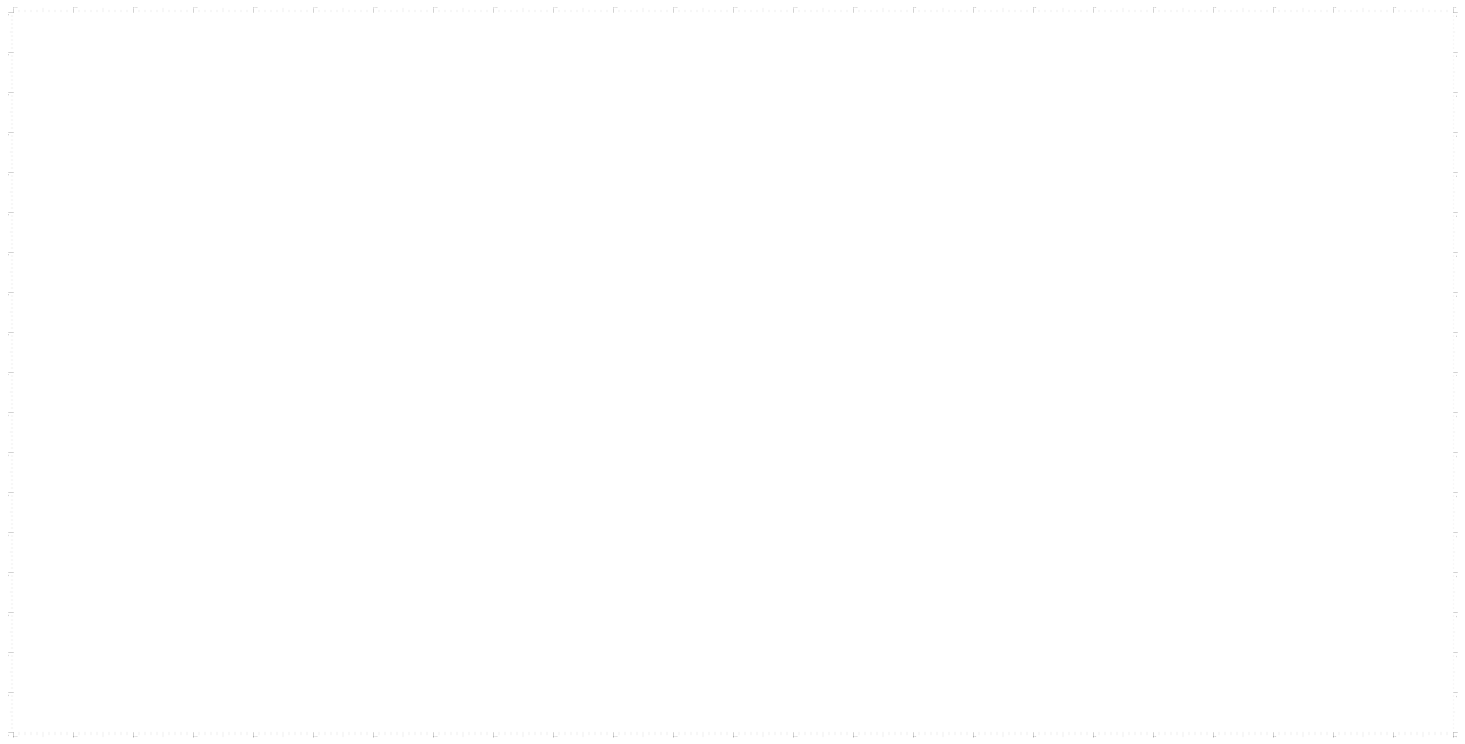

In [13]:
savename = './figures/gridlines_labels.pdf'

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
shift = 20.242874009/20
shift_y = 360*(shift/2)-180
shift_x = 180*(shift/2)-90

lon_large = np.arange(-180, 181, 1*360/24)
lon_small = np.arange(-180, 181, 0.5*360/24)
lon_mini = np.arange(-180, 181, 0.1*360/24)
lat_large = np.arange(-90, 91, 10)
lat_small = np.arange(-90, 91, 5)
lat_mini = np.arange(-90, 91, 1)

for lg in lat_large: 
    ax.plot([-180-shift_x, -180], [lg]*2, color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(-180-shift_x, lg, str(lg)+"°", rotation=-90,
            color='k', alpha=0.35, ha='right', va='top', clip_on=False, fontsize=2)
    ax.plot([180+shift_x, 180], [lg]*2, color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(180+shift_x, lg, str(lg)+"°", rotation=90,
            color='k', alpha=0.35, ha='left', va='top', clip_on=False, fontsize=2)
for sm in lat_small: 
    if sm not in lat_large: 
        ax.plot([-180-shift_x*0.5, -180], [sm]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([180+shift_x*0.5, 180], [sm]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
for m in lat_mini: 
    if (m not in lat_large) and (m not in lat_small): 
        ax.plot([-180-shift_x*0.25, -180], [m]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([180+shift_x*0.25, 180], [m]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
for i, lg in enumerate(lon_large): 
    hr = int(24 - i)
    ax.plot([lg]*2, [-90-shift_y*0.5, -90], color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(lg, -90-shift_y*0.5, str(hr)+"HR", color='k', alpha=0.35, 
            ha='left', va='bottom', clip_on=False, fontsize=2)
    ax.plot([lg]*2, [90+shift_y*0.5, 90], color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(lg, 90+shift_y*0.5, str(hr)+"HR", color='k', alpha=0.35, 
            ha='left', va='bottom', clip_on=False, fontsize=2)
for sm in lon_small: 
    if sm not in lon_large: 
        ax.plot([sm]*2, [-90-shift_y*0.5, -90], color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([sm]*2, [90+shift_y*0.5, 90], color='k', lw=0.25, alpha=0.25, clip_on=False)
for m in lon_mini: 
    if (m not in lon_large) and (m not in lon_small): 
        ax.plot([m]*2, [-90-shift_y*0.25, -90], color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([m]*2, [90+shift_y*0.25, 90], color='k', lw=0.25, alpha=0.25, clip_on=False)

set_save_image(fig, savename)